# (AdaViT) ADAPTIVE VISION TRANSFORMERS

### SAPIENZA UNIVESITY of ROME (DEPARTMENT OF COMPUTER, CONTROL AND MANAGEMENT ENGINEEERING)

### COURSE IN ARTIFICIAL INTELLIGENCE AND ROBOTICS (ACADEMIC YEAR 2023/2024)

### NEURAL NETWORK's PROJECT
- Professors: SIMONE SCARDAPANE, DANILO COMMINIELLO 

### AUTHORS:
- **ALESSIO BORGI**
    - University ID: 1952442
    - Email: borgi.1952442@studenti.uniroma.it
- **ANGELO GIANFELICE**
    - University ID: 1851260
    - Email: gianfelice.1851260@studenti.uniroma.it
    
### 

## TABLE OF CONTENTS:
- **0: IMPORTING LIBRARIES AND SETTING THE SEEDS**
- **1: DATASET INSPECTION**
    - **1.1: CREATION OF THE LABEL DICTIONARY**
    - **1.2: DISPLAYING EXAMPLES OF THE DATASET (ENCODED LABELS)**
    - **1.3: DISPLAYING EXAMPLES OF THE DATASET (DECODED LABELS)**
- **2: DATA-MODULE DEFINITION**
    - **2.0: CUSTOMIZED TRANSFORM CLASS**
    - **2.1: CUSTOMIZED TRAINING SET VERSION**
    - **2.2: CUSTOMIZED VALIDATION SET VERSION**
    - **2.3: GENERAL DATA-MODULE DEFINITION**
    - **2.4: TESTING TRAINING AND VALIDATION DATALOADERS**

- **3: MODEL DEFINITION**
    - **3.0: PATCHING FUNCTION DEFINITION (PATCHIFYING)**
    - **3.1: DISPLAYING PATCHIFYING RESULT**
    - **3.2: POSITIONAL EMBEDDING DEFINITION**
        - **3.2.1: SINUSOIDAL POSITIONAL EMBEDDINGS (SPE)**
        - **3.2.2: ROTARY POSITIONAL EMBEDDINGS (RoPE)**
        - **3.2.3: VISUALIZE POSITIONAL EMBEDDINGS**
    - **3.3: MULTI-HEAD SELF-ATTENTION (DEFINITION)**
        - **3.3.1: BASIC MHSA WITH DOT PRODUCT**
        - **3.3.2: GENERALIZED MHSA WITH COSINE SIMILARITY**
        - **3.3.5: MHSA IMPLEMENTATION**
    - **3.4: ViT BLOCK DEFINITION**
        - **3.4.1: ViT BLOCK: LAYER NORMALIZATION**
        - **3.4.2: ViT BLOCK: INSTANCE NORMALIZATION**
        - **3.4.3: MLP-MIXER BLOCK**
    - **3.5: AdaViT MODEL DEFINITION**
        - **3.5.1: TARGET DISTRIBUTIONAL PRIOR**
        - **3.5.2: MYVIT CLASS DEFINITION**
        - **3.5.3: FINAL AViT MODEL DEFINITION**


- **4: MODEL TRAINING**
    - **4.1: CALLBACK DEFINITION**
    - **4.2: MODEL INSTANTIATION & TRAINING**
- **5: BEST MODEL EXTRAPOLATION & SAVINGS** 
- **6: TRAINING FROM A SAVED CHECKPOINT** 
- **7: MODEL TESTING (INFERENCE TIME)**
- **8: EXPERIMENTS AND RESULTS**
    - **8.1: REACHING THE BASELINE MODEL**
    - **8.2: ViT VS AdaViT COMPARISON ANALYSIS**
    - **8.3: SPE VS RoPE POSITION EMBEDDING COMPARISON ANALYSIS**
    - **8.4: MHSA BLOCK VS MLP-MIXER BLOCK COMPARISON ANALYSIS**
    - **8.5: DOT PRODUCT ATTENTION VS GENERALIZED ATTENTION WITH COSINE SIMILARITY COMPARISON ANALYSIS**
    - **8.6: LAYER VS INSTANCE NORMALIZATION COMPARISON ANALYSIS**
- **9: CONCLUSIONS AND FUTURE WORKS**
- **10: REFERENCES**

## INTRODUCTION

### (ViT) Vision Transformer's Idea

In this Notebook, we aim to present an implementation of **Vision Transformers (ViT)**. The Vision Transformer (ViT) represents a paradigm in computer vision by leveraging transformer-based architectures for **Image Classification** tasks. 

Unlike traditional **Convolutional Neural Networks (CNNs)**,which rely on local receptive fields (**Locality Principle**) and **Hierarchical Feature Extraction** through convolutional layers, ViT dispenses with the conventional convolutional layers and adopts a **Transformer Model**, originally designed for sequential data processing, such as in NLP("Natural Language Processing"). 

If we look this idea with a birds-eye point of view, we have that ViT's core idea involves treating an input image as a sequence of non-overlapping fixed-size patches, linearly embeds them, and appends learnable positional embeddings, that are added to encode spatial information. The resulting sequence of patch embeddings is then fed into a stack of transformer encoder blocks. Each transformer block consists of multi-head self-attention mechanisms and feedforward neural networks, enabling the model to capture both local and global contextual information, enhancing the model's ability to recognize complex patterns and relationships. 

One **ViT's distinguishing Feature** is its ability to **capture Long-Range Dependencies in Images** through self-attention, facilitating understanding of the visual content. This stands in contrast to CNNs, which may struggle with information propagation across distant image regions due to the locality of convolutional operations. ViT's self-attention mechanism allows it to efficiently model relationships between distant patches, promoting effective feature learning for image recognition. Moreover, ViT exhibits promising **Scalability Advantages**, particularly when dealing with large datasets and high-resolution images. The absence of spatial hierarchies in ViT's architecture enables more straightforward parallelization, facilitating training on powerful hardware accelerators. This scalability, coupled with competitive performance on standard image classification benchmarks, positions ViT as a versatile and efficient alternative to traditional CNN-based approaches.

<div style="text-align:center">
  <img src="images/ViT_Architecture.png" alt="Screenshot" width="1200"/>
</div>






### (AdaViT) Adaptive Vision Transformer's Modification
Despite their remarkable advantages, Vision Transformers (ViTs) often face **Challenges** due to their fixed 2D positional encodings. This rigidity limits their ability to adapt to input image sizes and variations, hindering their applicability to real-world scenarios. To address these shortcomings, **Adaptive Vision Transformers (AdaViT)** emerge as a promising solution, introducing a **Dynamic Attention Mechanism** that allows the model to **selectively  take into account only Relevant Regions of the Input Image**, thereby overcoming the spatial resolution limitations of traditional ViTs. 

AdaViT enhances the vision transformer block by integrating an **Adaptive Halting Module**, which computes a **Halting Probability for each Token**. Remarkably, this module leverages the existing block parameters and utilizes a single neuron from the last dense layer in each block to calculate the halting probability, introducing **no additional Parameters** and **no additional Computational Overhead**. Tokens are discarded upon meeting the halting condition. Through the adaptive halting of tokens, we selectively perform dense computations only on those tokens considered informative for the given task. Consequently, as the vision transformer progresses through successive blocks, fewer tokens are processed, resulting in accelerated inference. 

This improvements leads to immediate and significant **Speed-Up at Inference Time** on standard computational platforms, without the need for additional tuning, and a significant **Reduction in the Model Weight**.

### ABSTRACT & CONTRIBUTIONS

The **Vision Transformer (ViT)** has emerged as a powerful architecture for Image Classification. The Vision Transformer (ViT) fundamentally transforms image data by treating it as a sequence of tokens, akin to the processing of sequential data in natural language models. ViT employs self-attention mechanisms to capture global and local relationships within the image, enabling it to recognize complex patterns and hierarchies.

Despite its incredible power, ViT faces challenges related to computational efficiency and adaptability to varying levels of task complexity. In response to these challenges, we delve into **Adaptive Vision Transformer (A-ViT)**, a method designed to enhance the adaptability and computational efficiency of ViT models.

Undertaking a series of experiments despite ***limited computational resources***, we explored various avenues to **optimize the performance of A-ViT**. Our experimentation encompassed **different positional embeddings**, specifically Sinusoidal Positional Embeddings (**SPE**) and Relative Positional Embeddings (**RoPE**). Additionally, we delved into **diverse attention mechanisms**, comparing the effectiveness of the Multi-Head Self Attention (**MHSA**) in its **basic form** against the **Generalized MHSA with Cosine Similarity**.

Our experiments further extended to the **adjustment of critical parameters**, such as the **number of attention heads**, **number of blocks**, **hidden dimension**, **mlp_ratio** on both the MHSA Linear Classifier and on the ViT Block, **batch size**, **expected stop depth** of the Tokens in the AdaViT implementation, **temperature** applied after the logits computation, and so on and so forth. 

Despite the constraints imposed by limited computational power, we conducted a **myriad of small-scale experiments** to comprehensively **understand the behavior and performance of A-ViT in various scenarios**.

In the subsequent sections, we present a detailed analysis of our findings, shedding light on the nuances of A-ViT's adaptability, efficiency gains, and its potential implications for a wide array of computer vision tasks.

### 0: IMPORTING LIBRARIES AND SETTING THE SEEDS

In this stage, we import essential libraries and modules, laying the groundwork for subsequent code implementation and experimentation. Additionally, this step emphasizes the establishment of seed values, practice done for ensuring reproducibility in data processing, model training, and evaluation. 

In [5]:

# Importing PyTorch-related Libraries.
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToPILImage
from torch.optim.lr_scheduler import CosineAnnealingLR
from torchmetrics.classification import Accuracy, MulticlassF1Score, MulticlassPrecision, MulticlassRecall

# Importing PyTorch Lightning-Related Libraries.
import pytorch_lightning as pl
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import TensorBoardLogger, CSVLogger
from pytorch_lightning.callbacks import TQDMProgressBar, LearningRateMonitor, ModelCheckpoint

# Importing General Libraries.
import os
import csv
import PIL
import time
import glob
import random
import numpy as np
from PIL import Image
import seaborn as sns
from pathlib import Path
from scipy.stats import norm
import matplotlib.pyplot as plt
from collections import OrderedDict


In [6]:

def seed_everything(seed):
    """
    Seeds basic parameters for reproductibility of results.
    
    Arguments:
        - seed {int} : Number of the seed.
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    pl.seed_everything(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
# Set the seed.
seed_everything(31)

### 1: DATASET INSPECTION

We subsequently focus on experiencing a comprehensive exploration and understanding of the dataset at hand. This phase involves an in-depth examination of the data's structure, characteristics, and content. We delve into visualizing dataset images along with their corresponding labels. 

#### TINY IMAGENET
The **TinyImageNet** dataset is a subset of the 1.2 million images in ImageNet, specifically selected to be 20% as large as ImageNet while preserving the same distribution of classes. This makes it a more manageable dataset for our case where we have limited computational power, training and evaluating vision models, while still providing a challenging and diverse representation of real-world images.

TinyImageNet consists of **200 Classes, each** containing **640 Images**. The class distribution is similar to that of ImageNet, with a slight overrepresentation of animals and objects commonly found in everyday life. The images are downsampled to **64x64** pixels, making them smaller and less computationally expensive to handle than full-resolution ImageNet images.


#### 1.1: CREATION OF THE LABEL DICTIONARY

Here, we initiate the creation of a **Label Dictionary** to establish a meaningful mapping between encoded labels and their corresponding actual labels. The process extracts this from a file containing label information. The resulting dictionary serves as a key reference for interpreting encoded labels and facilitates a clearer understanding of the dataset's class labels. 

In [7]:

# Initialize the Mapping Dictionary to be empty.
mapping_dict = {}

# Open the file in read mode.
with open('/kaggle/input/tiny-imagenet/tiny-imagenet-200/words.txt', 'r') as file:
    
    # Read each line from the file.
    for line in file:
        # Split the line into tokens based on whitespace.
        tokens = line.strip().split('\t')
        
        # Check if there are at least two tokens.
        if len(tokens) >= 2:
            # Extract the encoded label (left) and actual label (right).
            encoded_label, actual_label = tokens[0], tokens[1]
            
            # Add the mapping to the dictionary.
            mapping_dict[encoded_label] = actual_label

# Print the mapping dictionary.
#print(mapping_dict)


#### 1.2: DISPLAYING EXAMPLES OF THE DATASET (ENCODED LABELS)

In this exploration code, we aim to load and explore the **Tiny ImageNet** dataset. After loading the dataset, the class names and their respective counts are extracted. We visualize a grid containing ten randomly selected images from the dataset, showcasing both the image itself and its associated **Class Label (Encoded)**. 

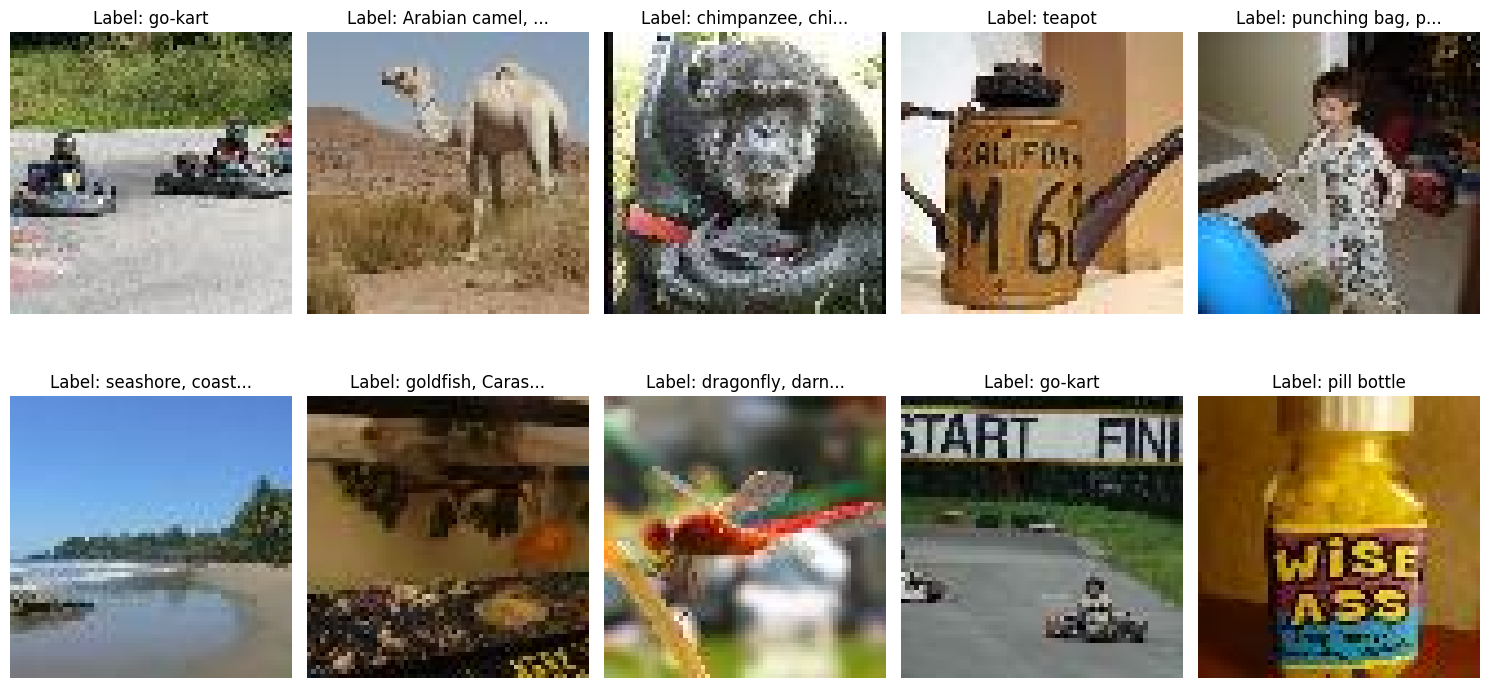

In [8]:

# Loading the dataset using ImageFolder.
dataset0 = datasets.ImageFolder(root="/kaggle/input/tiny-imagenet/tiny-imagenet-200/train/", transform=None)

# Extract class names and their counts.
class_names = dataset0.classes
class_counts = [dataset0.targets.count(i) for i in range(len(class_names))]

# Setting the seed.
np.random.seed(31)

# Create a grid of 10 images with labels.
plt.figure(figsize=(15, 8))

for i in range(10):
    
    # Randomly select an image and its corresponding label.
    index = np.random.randint(len(dataset0))
    image, encoded_label = dataset0[index]
    
    # Look up the actual label using the mapping dictionary.
    actual_label = mapping_dict.get(class_names[encoded_label], "Unknown Label")
    
    # Trim the label if it exceeds the maximum length.
    actual_label_trimmed = actual_label[:15] + '...' if len(actual_label) > 15 else actual_label

    # Display the image with its label..
    plt.subplot(2, 5, i+1)
    plt.imshow(np.array(image))  
    plt.title(f"Label: {actual_label_trimmed}", wrap=True)
    plt.axis('off')

# Displaying Dataset examples.
plt.tight_layout()
plt.show()

#### 1.3: DISPLAYING EXAMPLES OF THE DATASET (DECODED LABELS)

In this exploration code, we aim to load and explore the **Tiny ImageNet** dataset, together with the **(Decoded) Class Labels**, making use of the Label Dictionary extracted in *step 1.1*. 

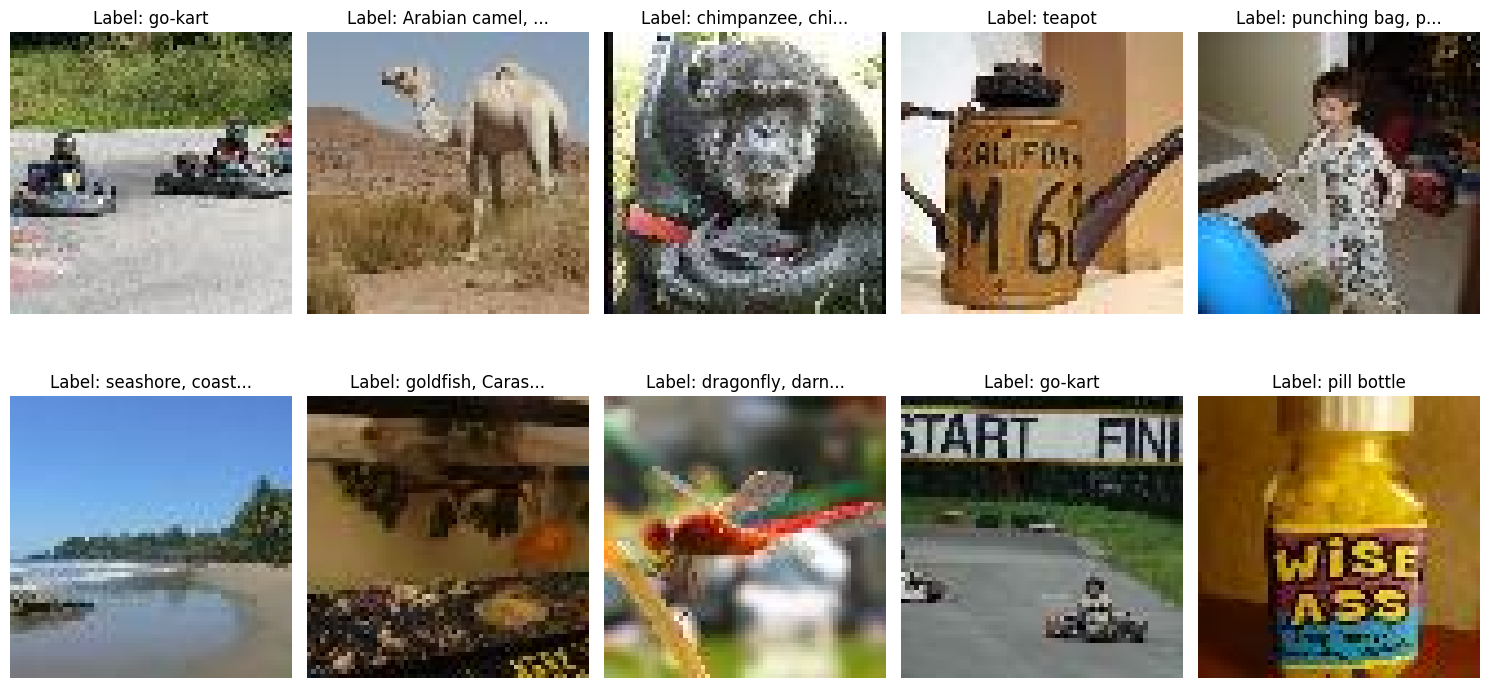

In [9]:

# Loading the dataset using ImageFolder.
dataset0 = datasets.ImageFolder(root="/kaggle/input/tiny-imagenet/tiny-imagenet-200/train/", transform=None)

# Extract class names and their counts.
class_names = dataset0.classes
class_counts = [dataset0.targets.count(i) for i in range(len(class_names))]

# Setting the seed.
np.random.seed(31)

# Create a grid of 10 images with labels.
plt.figure(figsize=(15, 8))

for i in range(10):
    
    # Randomly select an image and its corresponding label.
    index = np.random.randint(len(dataset0))
    image, encoded_label = dataset0[index]
    
    # Look up the actual label using the mapping dictionary.
    actual_label = mapping_dict.get(class_names[encoded_label], "Unknown Label")
    
    # Trim the label if it exceeds the maximum length.
    actual_label_trimmed = actual_label[:15] + '...' if len(actual_label) > 15 else actual_label

    # Display the image with its label..
    plt.subplot(2, 5, i+1)
    plt.imshow(np.array(image))  
    plt.title(f"Label: {actual_label_trimmed}", wrap=True)
    plt.axis('off')

# Displaying Dataset examples.
plt.tight_layout()
plt.show()

### 2: DATA-MODULE DEFINITION

#### 2.0: CUSTOMIZED TRANSFORM CLASS

We implement the **"AdaViT_Transformations" Class** in order to define and make some experiments including the application of a series of **Image Transformations** using the torchvision library. The __call__ method serves as the entry point for the transformation pipeline, taking an input image sample in the form of a PIL.Image.Image or a torch.Tensor. This class serves as a modular and extensible means to preprocess images before they are fed into the AdaViT model, allowing for flexibility in experimentation and ensuring the model's robustness to variations in input data. The augmentation process typically enhances the model's ability to learn from diverse visual patterns within the dataset, contributing to improved generalization and performance.

In [10]:

class AdaViT_Transformations:
    
    def __init__(self):
        
        # Constructor - Nothing to initialize in this case
        pass

    def __call__(self, sample):
        """
        Call method to perform transformations on the input sample.

        Args:
        - sample (PIL.Image.Image or torch.Tensor): Input image sample.

        Returns:
        - transformed_sample (torch.Tensor): Transformed image sample.
        """

        # Define a series of image transformations using "torchvision.Compose" function.
        transform = transforms.Compose([
            transforms.ToTensor(),  
            # Additional transformations can be added here.
            # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  
            # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  
        ])

        # Apply the defined transformations to the input sample.
        transformed_sample = transform(sample)

        return transformed_sample

#### 2.1: CUSTOMIZED TRAINING SET VERSION
The following couple of sections, encompasses the development of a specific class for the **Training-Set Manipulation**. This class is devised with the explicit purpose of addressing unique requirements or modifications essential for the optimal training of the AdaViT model.


In [11]:

class CustomTrainingTinyImagenet(ImageFolder):
    
    def __init__(self, root, transform=None):
        """
        Custom dataset class for Tiny ImageNet Training data.

        Args:
        - root (str): Root directory containing the dataset.
        - transform (callable, optional): Optional transform to be applied to the Input Image.
        """
        super(CustomTrainingTinyImagenet, self).__init__(root, transform=transform)

        # Create mappings between class labels and numerical indices
        self.class_to_index = {cls: idx for idx, cls in enumerate(sorted(self.classes))}
        self.index_to_class = {idx: cls for cls, idx in self.class_to_index.items()}

    def __getitem__(self, index):
        """
        Method to retrieve an item from the dataset.

        Args:
        - index (int): Index of the item to retrieve.

        Returns:
        - sample (torch.Tensor): Transformed image sample.
        - target (int): Numerical index corresponding to the class label.
        """
        # Retrieve the item and its label from the Dataset.
        path, target = self.samples[index]

        # Load the image using the default loader.
        sample = self.loader(path)

        # Apply the specified transformations, if any.
        if self.transform is not None:
            sample = self.transform(sample)

        # Adjust the directory depth to get the target label.
        target_str = os.path.basename(os.path.dirname(os.path.dirname(path)))

        # Convert string label to numerical index using the mapping.
        target = self.class_to_index[target_str]

        return sample, target

    def get_class_from_index(self, index):
        """
        Method to retrieve the class label from a numerical index.

        Args:
        - index (int): Numerical index corresponding to the class label.

        Returns:
        - class_label (str): Class label corresponding to the numerical index.
        """
        
        return self.index_to_class[index]

#### 2.2: CUSTOMIZED VALIDATION SET VERSION
As anticipated in the previous section, also this section, encompasses the development of a specific class, but this time aimed at the **Validation-Set Manipulation**. This class is devised with the explicit purpose of addressing unique requirements or modifications essential for the optimal Validation Process of the AdaViT model.

In [12]:

class CustomValidationTinyImagenet(pl.LightningDataModule):
    
    def __init__(self, root, transform=None):
        """
        Custom data module for Tiny ImageNet Validation data.

        Args:
        - root (str): Root directory containing the dataset.
        - transform (callable, optional): Optional transform to be applied to the Input Image.
        """
        self.root = Path(root)
        self.transform = transform

        # Load and preprocess labels
        self.labels = self.load_labels()
        self.label_to_index = {label: idx for idx, label in enumerate(sorted(set(self.labels.values())))}
        self.index_to_label = {idx: label for label, idx in self.label_to_index.items()}

    def load_labels(self):
        """
        Method to load and Pre-Process Labels from the Validation Dataset.

        Returns:
        - labels (dict): Dictionary mapping image names to labels.
        """
        label_path = "/kaggle/input/tiny-imagenet/tiny-imagenet-200/val/val_annotations.txt"
        labels = {}

        with open(label_path, "r") as f:
            lines = f.readlines()

        for line in lines:
            parts = line.split("\t")
            image_name, label = parts[0], parts[1]
            labels[image_name] = label

        return labels

    def __len__(self):
        """
        Method to get the length of the dataset.

        Returns:
        - length (int): Number of items in the dataset.
        """
        return len(self.labels)

    def __getitem__(self, index):
        """
        Method to retrieve an item from the dataset.

        Args:
        - index (int): Index of the item to retrieve.

        Returns:
        - image (torch.Tensor): Transformed image sample.
        - label (int): Numerical index corresponding to the class label.
        """
        image_name = f"val_{index}.JPEG"
        image_path = self.root / image_name

        # Open the image using PIL and convert to RGB.
        image = Image.open(image_path).convert("RGB")

        # Apply the specified transformations, if any.
        if self.transform:
            image = self.transform(image)

        # Use the get method to handle cases where the key is not present.
        label_str = self.labels.get(image_name, 'Label not found')

        # Convert string label to numerical index using the mapping.
        label = self.label_to_index[label_str]

        return image, label

    def get_label_from_index(self, index):
        """
        Method to retrieve the class label from a numerical index.

        Args:
        - index (int): Numerical index corresponding to the class label.

        Returns:
        - class_label (str): Class label corresponding to the numerical index.
        """
        return self.index_to_label[index]

In [13]:
class CustomTestTinyImagenet(pl.LightningDataModule):
    
    def __init__(self, root, transform=None):
        """
        Custom dataset class for Tiny ImageNet Test data.

        Args:
        - root (str): Root directory containing the dataset.
        - transform (callable, optional): Optional transform to be applied to the Input Image.
        """
        self.root = root
        self.transform = transform
        self.image_paths = self._get_image_paths()

    def __len__(self):
        """
        Method to get the total number of items in the dataset.

        Returns:
        - int: Total number of items in the dataset.
        """
        return len(self.image_paths)

    def __getitem__(self, index):
        """
        Method to retrieve an item from the dataset.

        Args:
        - index (int): Index of the item to retrieve.

        Returns:
        - sample (torch.Tensor): Transformed image sample.
        - filename (str): Filename of the image.
        """
        # Get the image path based on the index.
        image_path = self.image_paths[index]

        # Load the image using the default loader.
        sample = Image.open(image_path)

        # Apply the specified transformations, if any.
        if self.transform is not None:
            sample = self.transform(sample)

        # Extract the filename from the image path.
        filename = os.path.basename(image_path)

        # Return a tuple containing the sample and filename.
        return sample, filename

    def _get_image_paths(self):
        """
        Helper method to get the paths of all images in the test dataset.

        Returns:
        - list: List of image paths.
        """
        image_paths = [os.path.join(self.root, filename) for filename in os.listdir(self.root)]
        return image_paths


#### 2.3: GENERAL DATA-MODULE DEFINITION

In this section, we wrote the **General Data Module**, denoted as **AViT_DataModule}**. This class extends $\texttt{pl.LightningDataModule}$ and serves as the cornerstone for loading and organizing datasets tailored for AViT model training and validation. The constructor takes essential parameters such as directory paths for the training and validation  datasets, batch size, and an optional argument for the number of workers in DataLoader.


In [14]:

class AViT_DataModule(pl.LightningDataModule):
    
    def __init__(self, train_data_dir, val_data_dir, test_data_dir, batch_size, num_workers=4):
        """
        Custom data module for AViT model training and validation.

        Args:
        - train_data_dir (str): Directory path for the training dataset.
        - val_data_dir (str): Directory path for the validation dataset.
        - batch_size (int): Batch size for training and validation DataLoader.
        - num_workers (int, optional): Number of workers for DataLoader (default is 4).
        """
        super(AViT_DataModule, self).__init__()
        self.train_data_dir = train_data_dir
        self.val_data_dir = val_data_dir
        self.test_data_dir = test_data_dir
        self.batch_size = batch_size
        self.batch_size_test = 5
        self.num_workers = num_workers

        # Use AdaViT transformations for data augmentation
        self.transform = AdaViT_Transformations()

    def setup(self, stage=None):
        """
        Method to load and configure datasets for Training and Validation.

        Args:
        - stage (str, optional): 'fit' for Training and 'test' for Validation (default is None).
        """
        # Load Train dataset using CustomTrainingTinyImagenet with the new directory structure.
        self.train_dataset = CustomTrainingTinyImagenet(self.train_data_dir, transform=self.transform)

        # Load Validation dataset.
        self.val_dataset = CustomValidationTinyImagenet(self.val_data_dir, transform=self.transform)
        
        # Load Test dataset.
        self.test_dataset = CustomTestTinyImagenet(self.test_data_dir, transform=self.transform)

    def train_dataloader(self):
        """
        Method to return the DataLoader for the Training Dataset.

        Returns:
        - train_dataloader (DataLoader): DataLoader for Training.
        """
        return DataLoader(self.train_dataset, batch_size=self.batch_size, num_workers=self.num_workers, shuffle=True)

    def val_dataloader(self):
        """
        Method to return the DataLoader for the Validation Dataset.

        Returns:
        - val_dataloader (DataLoader): DataLoader for Validation.
        """
        return DataLoader(self.val_dataset, batch_size=self.batch_size, num_workers=self.num_workers)
    
    def test_dataloader(self):
        """
        Method to return the DataLoader for the Test Dataset.

        Returns:
        - test_dataloader (DataLoader): DataLoader for Test Set.
        """
        return DataLoader(self.test_dataset, batch_size=self.batch_size_test, num_workers=self.num_workers)

#### 2.4: TESTING TRAINING AND VALIDATION DATALOADERS

In this section, the code is dedicated to testing the training, validation and test dataloaders implemented within the AViT_DataModule. The process involves setting up the data module with specified directories for training and validation datasets, followed by the visualization of both a pair of examples from the Training Batch, the Validation Batch, and Test Batch with their correspondent Label.



In [15]:

def show_images_labels(images, labels, title):
    """
    Display Images with corresponding Labels.

    Parameters:
    - images (list of tensors): List of Image tensors.
    - labels (list): List of corresponding Labels.
    - title (str): Title for the entire subplot.

    Returns:
    None
    """
    # Create a Subplot with 1 row and len(images) columns.
    fig, axs = plt.subplots(1, len(images), figsize=(8, 4))
    
    # Set the title for the entire subplot.
    fig.suptitle(title)

    # Iterate over Images and Labels.
    for i, (img, label) in enumerate(zip(images, labels)):
        # Display each Image in a subplot.
        axs[i].imshow(transforms.ToPILImage()(img))
        
        # Set the title for each subplot with the corresponding label.
        axs[i].set_title(f"Label: {label}")
        
        # Turn off axis labels for better Visualization.
        axs[i].axis('off')

    # Show the entire subplot.
    plt.show()


In [16]:
def show_images_test(images, title):
    """
    Show a batch of images for testing.

    Parameters:
    - images (list): List of image tensors.
    - title (str): Title of the plot.

    Returns:
    None
    """
    # Create a subplot for each image.
    fig, axs = plt.subplots(1, len(images), figsize=(8, 5))
    
    # If there's only one image, axs is not iterable, so convert it to a list.
    axs = [axs] if len(images) == 1 else axs

    # Iterate over images.
    for i, (img, ax) in enumerate(zip(images, axs)):
        if isinstance(img, str):
            # If img is a string, load the image using PIL.
            img = Image.open(img)
        ax.imshow(transforms.ToPILImage()(img))  # Assuming images are tensors
        ax.axis('off')

    # Set the title of the plot.
    plt.suptitle(title)
    plt.show()


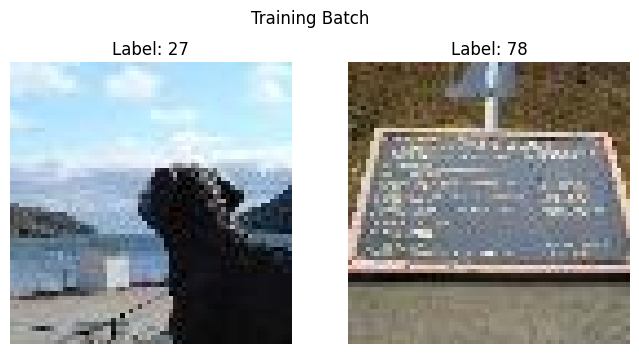

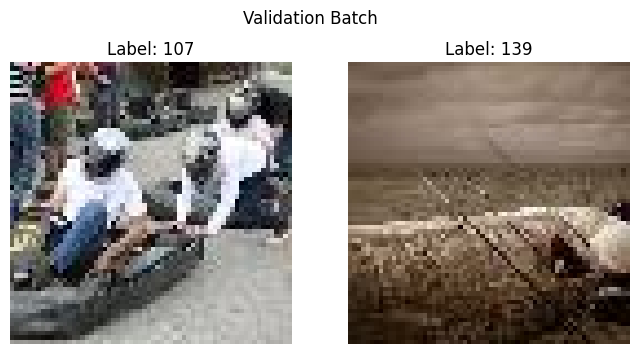

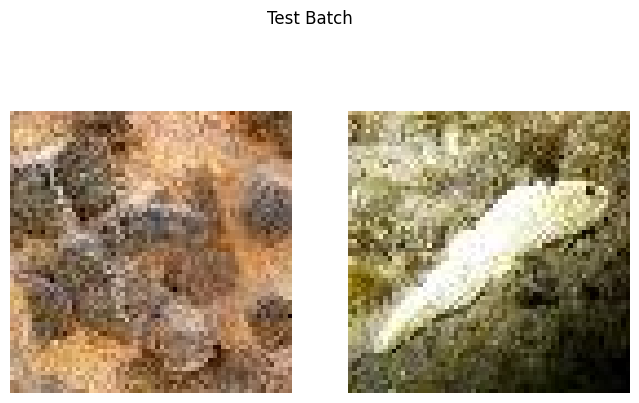

In [17]:
# Define the AViT_DataModule.
data_module = AViT_DataModule(
    train_data_dir="/kaggle/input/tiny-imagenet/tiny-imagenet-200/train/",
    val_data_dir="/kaggle/input/tiny-imagenet/tiny-imagenet-200/val/images/",
    test_data_dir="/kaggle/input/tiny-imagenet/tiny-imagenet-200/test/images/",
    batch_size=512
)

# Setup the Dataloaders.
data_module.setup()

# Get a batch from the Training DataLoader.
train_dataloader = data_module.train_dataloader()
train_batch = next(iter(train_dataloader))

# Get a batch from the Validation DataLoader.
val_dataloader = data_module.val_dataloader()
val_batch = next(iter(val_dataloader))

# Get a batch from the Test DataLoader.
test_dataloader = data_module.test_dataloader()
test_batch = next(iter(test_dataloader))

# Show two Images from the Training Batch.
show_images_labels(train_batch[0][:2], train_batch[1][:2], title='Training Batch')

# Show two Images from the Validation Batch.
show_images_labels(val_batch[0][:2], val_batch[1][:2], title='Validation Batch')

# Show two Images from the Test Batch.
test_batch = next(iter(test_dataloader))
show_images_test(test_batch[0][:2], title='Test Batch')



### 3: MODEL DEFINITION



#### 3.0: PATCHING FUNCTION DEFINITION (PATCHIFYING)

In input we get **3D Images** in the form $x \in R^{H\times W \times C}$. This images are processed, of course, in Batches, that, in our case is set, mostly to $b=512$, resulting in the Input being: $R^{B \times C \times H\times W}$. Images must be transformed into sequences, and for this reason we proceed to **dividing the Images** in a **Sequence of flattened 3D Patches**, through a process denoted as **Patchifying**, where the sequence of flattened patches is $x_{p} \in R^{N\times (P^{2} \cdot C)}$, where:

- **(H, W, C)**: This is Resolution of the Original Image, respectively being the **(H) Height**, **(W) Width**, and **(C) Channels**.
- **(P, P)**: This the Resolution of each image Patch. 
- **N**: This is the is the resulting number of patches, defined as: 
$$N = \frac{H \times W}{P^2}$$

In [18]:

def Make_Patches_from_Image(images, n_patches):
    """
    Extract patches from input images.

    Parameters:
    - images (torch.Tensor): Input images tensor with shape (batch_size, channels, height, width).
    - n_patches (int): Number of patches in each dimension.

    Returns:
    torch.Tensor: Extracted patches tensor with shape (batch_size, n_patches^2, patch_size^2 * channels).
    """
    # Get the dimensions of the input images.
    n, c, h, w = images.shape

    # Ensure that the input images are square.
    assert h == w, "make_patches_from_image method is implemented for square images only!"

    # Initialize a tensor to store the extracted patches.
    patches = torch.zeros(n, n_patches ** 2, h * w * c // n_patches ** 2)
    patch_size = h // n_patches

    # Loop over each image in the batch.
    for idx, image in enumerate(images):
        # Loop over each patch in both dimensions.
        for i in range(n_patches):
            for j in range(n_patches):
                # Extract the patch from the image.
                patch = image[:, i * patch_size: (i + 1) * patch_size, j * patch_size: (j + 1) * patch_size]
                # Flatten the patch and store it in the patches tensor.
                patches[idx, i * n_patches + j] = patch.flatten()

    return patches


#### 3.1: DISPLAYING PATCHIFYING RESULT

We proceed to test the **Patchifying Result**, by visualizying the patches that are outputted from the patchifying step. 

In [19]:

# Helper function to Visualize Patches.
def visualize_patches(images, n_patches, title):
    """
    Visualize patches extracted from Images.

    Parameters:
    - images (torch.Tensor): Input images tensor with shape (batch_size, channels, height, width).
    - n_patches (int): Number of patches in each dimension.
    - title (str): Title for the entire subplot.

    Returns:
    None
    """
    # Extract patches from the input images using the make_patches_from_image function.
    patches = Make_Patches_from_Image(images, n_patches)
    
    # Create a subplot for visualizing patches.
    fig, axs = plt.subplots(n_patches, n_patches, figsize=(8, 8))
    fig.suptitle(title)
    
    # Calculate the patch size based on the input images.
    patch_size = images.shape[-1] // n_patches

    # Loop over each patch in both dimensions.
    for i in range(n_patches):
        for j in range(n_patches):
            # Calculate the index of the patch.
            patch_index = i * n_patches + j
            # Reshape each patch to (3, patch_size, patch_size).
            patch = patches[0, patch_index].reshape(3, patch_size, patch_size).cpu().numpy()
            # Display the patch in the subplot.
            axs[i, j].imshow(patch.transpose(1, 2, 0))
            axs[i, j].axis('off')

    # Show the entire subplot.
    plt.show()


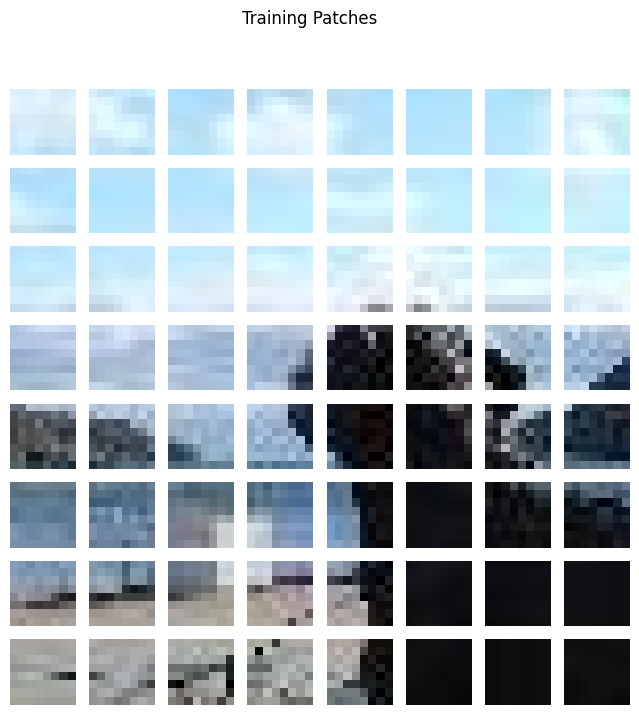

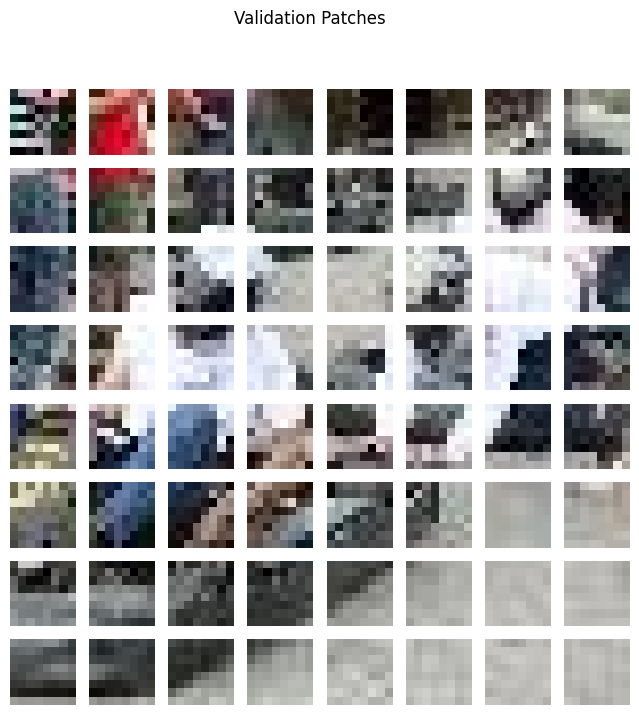

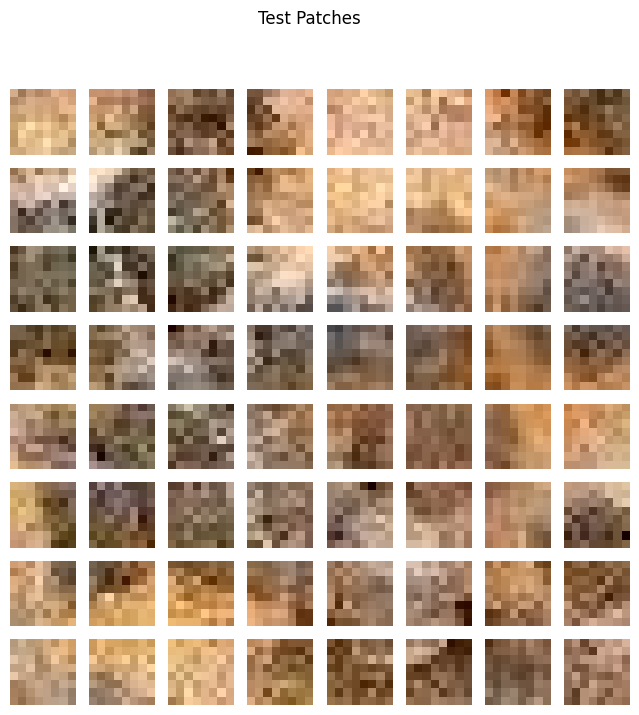

In [20]:
# Visualize patches for a Training Image.
visualize_patches(train_batch[0], n_patches=8, title='Training Patches')

# Visualize patches for a Validation Image.
visualize_patches(val_batch[0], n_patches=8, title='Validation Patches')

# Visualize patches for a Test Image.
visualize_patches(test_batch[0], n_patches=8, title='Test Patches')

#### 3.2: POSITIONAL EMBEDDING DEFINITION

We then proceed in the definition of the **Positional Embedding**. In the context of Transformer models, the inclusion of positional information is essential for capturing the sequential relationships within input sequences. Positional embeddings provide a means to convey the order or position of tokens in the input, contributing to the model's ability to understand the sequential structure of the data.


#### 3.2.1: SINUSOIDAL POSITIONAL EMBEDDINGS (SPE)

One common approach to generating positional embeddings is through the use of **Sine** and **Cosine Functions with varying frequencies**. The basic formulation for calculating **Sinusoidal Positional Embeddiings(SPE)** can be expressed as follows:

$$\text{{SPE}}(i, 2j) = \sin\left(\frac{i}{10000^{(2j/d)}}\right)$$

$$\text{{SPE}}(i, 2j + 1) = \cos\left(\frac{i}{10000^{(2j/d)}}\right)$$

Here, $i$ represents the position of the token in the sequence, $j$ represents the index of the embedding dimension, and $d$ is the total dimensionality of the embeddings. The function $\text{{PositionalEmbedding}}(i, j)$ returns the value of the positional embedding at position $i$ and dimension $j$.

In [21]:

def get_positional_embeddings_SPE(sequence_length, d):
    """
    Generate Positional Embeddings for the Transformer Model.

    Parameters:
    - sequence_length (int): Length of the input sequence.
    - d (int): Dimension of the embeddings.

    Returns:
    torch.Tensor: Positional Embeddings tensor of shape (sequence_length, d).
    """
    # Generate a tensor of positions from 0 to sequence_length - 1.
    positions = torch.arange(0, sequence_length).float().view(-1, 1)
    
    # Calculate div_term for both sin and cos terms.
    div_term = torch.exp(torch.arange(0, d, 2).float() * -(np.log(10000.0) / d))

    # Initialize the embeddings tensor with zeros.
    embeddings = torch.zeros(sequence_length, d)
    
    # Compute sin and cos terms and assign them to the embeddings tensor.
    embeddings[:, 0::2] = torch.sin(positions / div_term)
    embeddings[:, 1::2] = torch.cos(positions / div_term)

    return embeddings

#### 3.2.2: ROTARY POSITIONAL EMBEDDINGS (RoPE)

The **Rotary Positional Embedding (RoPE)** is a technique used in Transformer models to incorporate positional information into the input embeddings. Unlike the traditional Sinusoidal Positional Embeddings (SPE), RoPE simplifies the calculation of angles for sine and cosine terms. Indeed, **SPE** presents some **drawbacks**: 
- **Computational Intensity**: Involves computationally expensive exponentiation and division operations.
- **Scalability Issues**: Can become computationally burdensome with larger sequences and higher embedding dimensions.

Let $i$ represent the position index in the sequence, and $j$ represent the dimension index in the embedding vector. The **Rotary Positional Embedding (RoPE)** is defined as follows:

$$\text{{RPE}}(i, 2j) = \sin\left(\frac{i}{2^{(j/d)}}\right)$$

$$
\text{{RPE}}(i, 2j + 1) = \cos\left(\frac{i}{2^{(j/d)}}\right)
$$

where:
- $i$ is the position index ranging from $0$ to $\text{{sequence\_length}} - 1$.
- $j$ is the dimension index in the embedding vector ranging from $0$ to $d - 1$.
- $d$ is the dimension of the embeddings.

RoPE brings down the following pros:
- **Computationally Efficient**: RoPE utilizes powers of 2, potentially leading to faster training due to simplified calculations.
- **Reduced Complexity**: Avoids the need for costly exponentiation and division operations.



In [22]:
def get_positional_embeddings_RoPE(sequence_length, d):
    """
    Generate Rotary Positional Embeddings for the Transformer Model.

    Parameters:
    - sequence_length (int): Length of the input sequence.
    - d (int): Dimension of the embeddings.

    Returns:
    torch.Tensor: Rotary Positional Embeddings tensor of shape (sequence_length, d).
    """
    # Generate a tensor of positions from 0 to sequence_length - 1.
    positions = torch.arange(0, sequence_length).float().view(-1, 1)

    # Compute sin and cos terms directly using powers of 2.
    embeddings = torch.zeros(sequence_length, d)
    embeddings[:, 0::2] = torch.sin(positions / 2 ** (torch.arange(0, d, 2).float() / d))
    embeddings[:, 1::2] = torch.cos(positions / 2 ** (torch.arange(1, d, 2).float() / d))

    return embeddings
    

#### 3.2.3: VISUALIZE POSITIONAL EMBEDDINGS

We then continue by implementing a pair of helper functions, designed to provide a **Visual Representation**, and in particular both the two types of **Positional Embeddings**, SPE and RoPE. Firstly, we visualize them as position vs embedding value, and then making use of the Heatmap representation. 

In [23]:

# Helper function to Visualize Positional Embeddings.
def visualize_positional_embeddings(embeddings, type_emb):
    """
    Visualize the Positional Embeddings.

    Parameters:
    - embeddings (torch.Tensor): Positional embeddings tensor.

    Returns:
    None
    """
    
    # Get the number of dimensions (d) from the Embeddings Tensor.
    d = embeddings.size(1)

    # Set the figure size for a larger image.
    plt.figure(figsize=(12, 6))

    # Plot each dimension separately.
    for i in range(d):
        plt.plot(embeddings[:, i].numpy(), label=f'Dimension {i}')

    # Set plot labels.
    plt.xlabel('Position')
    plt.ylabel('Embedding Value')
    plt.title(f'{type_emb}: Visualization of Positional Embeddings')

    # Place the legend on the right and diminish its size.
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
    
    # Show the plot.
    plt.show()


In [24]:
# Helper function to Visualize Positional Embeddings as a Heatmap.
def visualize_positional_embeddings_heatmap(embeddings, type_emb):
    """
    Visualize the Positional Embeddings as a Heatmap.

    Parameters:
    - embeddings (torch.Tensor): Positional embeddings tensor.

    Returns:
    None
    """
    
    # Get the number of dimensions (d) from the Embeddings Tensor.
    d = embeddings.size(1)

    # Set the figure size for a larger image.
    plt.figure(figsize=(12, 6))

    # Create a heatmap for the positional embeddings.
    sns.heatmap(embeddings.T.numpy(), cmap='viridis', cbar_kws={'label': 'Embedding Value'})

    # Set plot labels and title.
    plt.xlabel('Position')
    plt.ylabel('Dimension')
    plt.title(f'{type_emb}: Visualization of Positional Embeddings (Heatmap)')
    
    # Show the plot.
    plt.show()


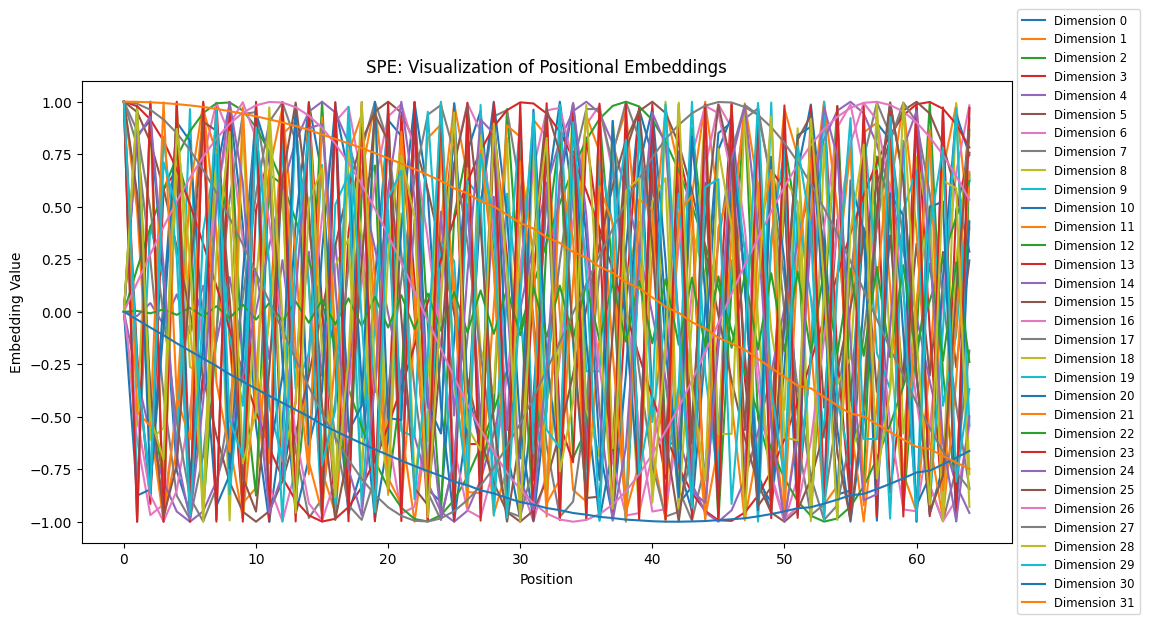

In [25]:
positional_embeddings = get_positional_embeddings_SPE(65, 32)
visualize_positional_embeddings(positional_embeddings, "SPE")

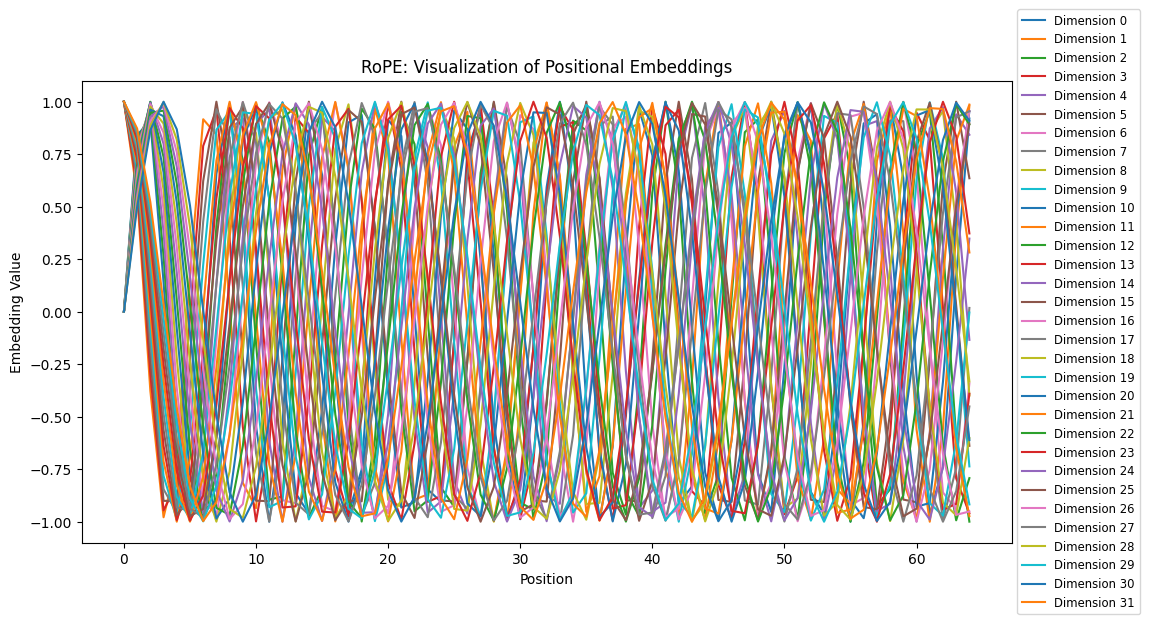

In [26]:
positional_embeddings = get_positional_embeddings_RoPE(65, 32)
visualize_positional_embeddings(positional_embeddings, "RoPE")

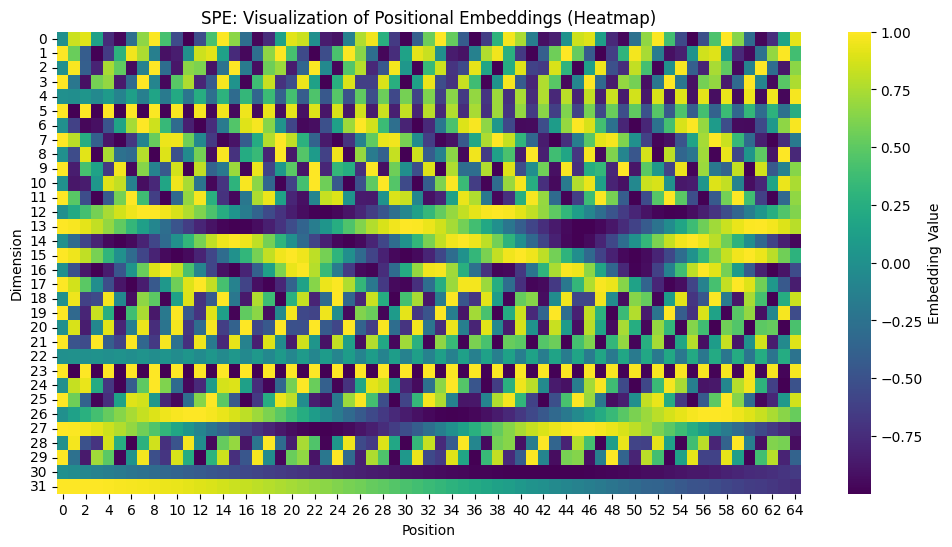

In [27]:
positional_embeddings = get_positional_embeddings_SPE(65, 32)
visualize_positional_embeddings_heatmap(positional_embeddings, "SPE")

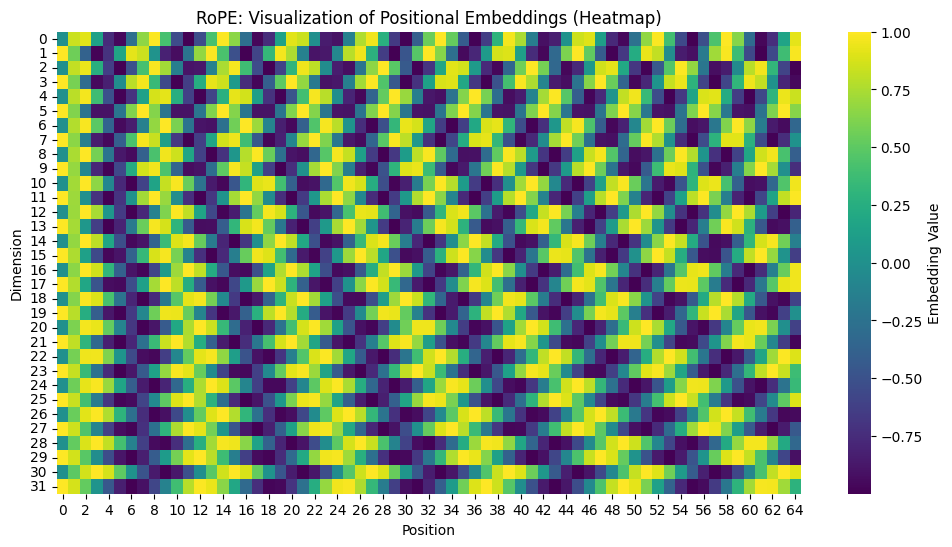

In [28]:
positional_embeddings = get_positional_embeddings_RoPE(65, 32)
visualize_positional_embeddings_heatmap(positional_embeddings, "RoPE")

### 3.3: MULTI-HEAD SELF-ATTENTION (DEFINITION)

We then proceed to define one core part of Vision Transformers, being the **Multi-Head Self Attention (MHSA) Module**. 

The **Multi-Head Self Attention(MHSA)** mechanism is a fundamental component in transformer-based neural network architectures, introduced to enhance the modeling capability of self-attention mechanisms. This mechanism allows the model to simultaneously focus on different aspects of the input sequence, capturing diverse relationships and dependencies within the data. 

In essence, Multi-Head Attention extends the basic self-attention mechanism by performing attention computations in parallel through multiple attention heads. Each head independently operates in different parts of the input sequence, enabling the model to learn complex patterns and relationships.

The key **Components of Multi-Head Attention** include:

- **Query, Key, and Value Projections:** Linear projections of input sequences to obtain Query (q), Key (k), and Value (V) vectors for each head.
    
- **Scaled Dot-Product Attention:** Computation of attention scores using the dot product of Query and Key vectors, followed by softmax activation to obtain attention weights.
    
- **Head Concatenation:** Concatenation of attended values from each head, followed by linear transformation to produce the final output.


The mathematical formulation for Multi-Head Attention is given by:

$$
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \ldots, \text{head}_H) \times W_O
$$

where each head \(i\) is computed as:

$$
\text{head}_i = \text{Attention}(Q \times W_{Qi}, K \times W_{Ki}, V \times W_{Vi})
$$

Here, \(W_{Qi}\), \(W_{Ki}\), \(W_{Vi}\), and \(W_O\) are learnable linear transformation matrices for each head.

We can visualize the MHSA Layer as follows:
<div style="text-align:center">
  <img src="images/MHSA.png" alt="Screenshot" width="600"/>
</div>



#### 3.3.1: MHSA WITH DOT PRODUCT
Given an input token sequence $X$ with shape $(N, sequence\_length, token\_dimension)$, the MHSA module processes each sequence independently through **Multiple Attention Heads**. For each head $i$ out of $H$ heads, it linearly maps the input sequence to query ($Q_i$), key ($K_i$), and value ($V_i$) spaces using learnable linear transformations. These mappings are calculated as follows:

$$Q_i = X \cdot W_{Qi}, \quad K_i = X \cdot W_{Ki}, \quad V_i = X \cdot W_{Vi}$$


where $W_{Qi}$, $W_{Ki}$, and $W_{Vi}$ are the weight matrices for the **Query**, **Key**, and **Value mappings**, respectively. 

After that, we focus on computing the **Attention Scores** as the **Query and Key Dot Product**, scaled by $\frac{1}{\sqrt{d_{\text{head}}}}$, and then passed through the **Softmax** function:

$$
\text{Attention}(Q_i, K_i) = \text{softmax}\left(\frac{Q_i \cdot K_i^T}{\sqrt{d_{\text{head}}}}\right)
$$

The **Final Output** for each head is obtained by applying the **Attention Scores** to the corresponding **Value mapping**:

$$
{Head\_Output}_i = \text{Attention}(Q_i, K_i) \cdot V_i
$$

These outputs from all attention heads are **concatenated and stacked vertically** to form the final output of the MHSA module:

$$
\text{Output} = \text{Concatenate}\left({Head\_Output}_1, \ldots, {Head\_Output}_H\right)
$$

The MHSA module is essential in capturing intricate patterns in the input sequence, facilitating the effective learning of contextual relationships.

Note that, in order to speed up the Training and start from a good point, we decided to **setup(initialize)** the **weights** using the **Xavier Initialization**.


In [29]:
def attention_MHSA_Dot_Product(q, k, v, d_head):
    """
    Multi-Head Self Attention (MHSA) mechanism with Dot Product.

    Parameters:
    - q (torch.Tensor): Query tensor with shape (seq_length, d_head).
    - k (torch.Tensor): Key tensor with shape (seq_length, d_head).
    - v (torch.Tensor): Value tensor with shape (seq_length, d_head).
    - d_head (int): Dimension of each attention head.

    Returns:
    torch.Tensor: Resultant attention tensor after applying Softmax.
    """
    
    # Calculate attention scores using the scaled dot-product attention formula.
    attention_scores = q @ k.T / (d_head ** 0.5)
    
    # Apply Softmax activation along the last dimension to obtain attention weights.
    attention_weights = nn.Softmax(dim=-1)(attention_scores)
    
    # Multiply attention weights by the value tensor to obtain the attended values.
    attended_values = attention_weights @ v
    
    return attended_values

#### 3.3.2: GENERALIZED MHSA WITH COSINE SIMILARITY

The **Generalized Multi-Head Attention with Cosine Similarity** is an alternative to the basic version of the MHSA.  

Given query ($q$), key ($k$), and value ($v$) tensors with shapes $({sequence length}, d head)$, and the dimension of each attention head ($head$), the **Attention Scores** are calculated using the scaled dot-product attention formula:

$$
attention scores = Softmax \left(CosineSimilarity\left(\frac{q}{\sqrt{d head}}, \frac{k}{\sqrt{d head}}\right)\right)
$$

Here, the query and key vectors are scaled by \(\frac{1}{\sqrt{dhead}}\) to **Mitigate** issues related to the **Vanishing Gradient Problem**.

The Softmax activation function is then applied along the last dimension to obtain **Attention Weights**:

$$
attention weights = Softmax(attention scores)
$$

Finally, the **Attended Values** are obtained by multiplying the attention weights by the value tensor:

$$
attended values = attention weights\cdot v
$$

The resulting $attended values$ tensor encapsulates the contextually relevant information from the input sequence, providing a weighted combination of values based on the cosine similarity between the query and key vectors.



The choice of the **Cosine Similarity** is justified by the fact that this similarity measure is **sensitive to the relative orientations of vectors**, which can be important for capturing the spatial relationships between pixels in images. These spatial relationships are crucial for image classification tasks, as they allow the model to identify and classify objects in the image based on their location and appearance.

In particular, **Cosine Similarity** is particularly well-suited for image classification tasks because:

- **Captures Local and Global Relationships**: Cosine similarity can effectively capture both local and global relationships in images. Local relationships refer to the relationships between nearby pixels, while global relationships refer to the relationships between pixels across the entire image. 

- **Robust to Rotation and Translation**: Cosine similarity is relatively robust to rotation and translation, which are common transformations in images. This robustness is due to the fact that cosine similarity focuses on the relative angles between vectors, rather than their absolute positions. This property allows the model to perform well even when the objects in the image are slightly rotated or translated.

- **Computationally Efficient**: Cosine similarity is computationally efficient and can be easily implemented in neural networks. This makes it a practical choice for our case, i.e.,  large-scale ViT models, which often operate on high-dimensional image representations.

In [30]:
def generalized_attention_MHSA_Cosine(q, k, v, d_head):
    """
    Multi-Head Self Attention (MHSA) mechanism with Generalized Attention using Cosine Similarity.

    Parameters:
    - q (torch.Tensor): Query tensor with shape (seq_length, d_head).
    - k (torch.Tensor): Key tensor with shape (seq_length, d_head).
    - v (torch.Tensor): Value tensor with shape (seq_length, d_head).
    - d_head (int): Dimension of each attention head.

    Returns:
    torch.Tensor: Resultant attention tensor after applying Generalized Attention with Cosine Similarity.
    """

    # Scale the query and key vectors.
    q_scaled = q / (d_head ** 0.5)
    k_scaled = k / (d_head ** 0.5)

    # Calculate attention scores using cosine similarity.
    attention_scores = nn.CosineSimilarity(dim=2, eps=1e-6)(q_scaled.unsqueeze(0), k_scaled)

    # Apply softmax activation along the last dimension to obtain attention weights.
    attention_weights = nn.Softmax(dim=-1)(attention_scores)

    # Multiply attention weights by the value tensor to obtain the attended values.
    attended_values = attention_weights @ v

    return attended_values

#### 3.3.5: MHSA IMPLEMENTATION

In the following section, we put together the **Multi-Head Self Attention(MHSA)** implementation we developed. notice that here, we need to include **one of the two option** we provided for the **Attention**:
- **Basic MHSA with Dot Product**
- **Generalized MHSA with Cosine Similarity**

Notice that in the implementation we also employ the Xavier Initialization for the q, k, v tensors. 


In [31]:

class MyMHSA(nn.Module):
    
    def __init__(self, d, n_heads=2):
        """
        Multi-Head Self Attention (MHSA) Module.

        Parameters:
        - d (int): Dimension of the input tokens.
        - n_heads (int): Number of attention heads.

        Returns:
        None
        """
        
        super(MyMHSA, self).__init__()
        self.d = d
        self.n_heads = n_heads

        assert d % n_heads == 0, f"Can't divide dimension {d} into {n_heads} heads"

        # Split the dimension into n_heads parts.
        d_head = int(d / n_heads)
        
        # Linear mappings for Query(q), Key(k), and Value(v) for each head.
        self.q_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.k_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.v_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        
        self.d_head = d_head
        self.softmax = nn.Softmax(dim=-1)
        
        # Initialize weights.
        self.initialize_weights_msa()
        
    def forward(self, sequences):
        """
        Forward pass of the MHSA module.

        Parameters:
        - sequences (torch.Tensor): Input token sequences with shape (N, seq_length, token_dim).

        Returns:
        torch.Tensor: Output tensor after MHSA with shape (N, seq_length, item_dim).
        """
        
        result = []
        for sequence in sequences:
            
            seq_result = []
            for head in range(self.n_heads):
                
                # Compute the q,k,v for every head. 
                q_mapping, k_mapping, v_mapping = self.q_mappings[head], self.k_mappings[head], self.v_mappings[head]

                # Extract the corresponding part of the sequence for the current head.
                seq = sequence[:, head * self.d_head: (head + 1) * self.d_head]
                q, k, v = q_mapping(seq), k_mapping(seq), v_mapping(seq)

                # Calculate Attention Scores with one of the methods.
                # 1) Basic MHSA with Dot Product.
                attention = attention_MHSA_Dot_Product(q, k, v, self.d_head)
                
                # 2) Generalized MHSA with Cosine Similarity.
                #attention = generalized_attention_MHSA_Cosine(q, k, v, self.d_head)
                
                # Append the Attention Scores.
                seq_result.append(attention)
            
            # Concatenate the results coming from the different Heads and Stack Vertically the result.
            result.append(torch.hstack(seq_result))
        
        # Concatenate results for all the sequences.
        return torch.cat([torch.unsqueeze(r, dim=0) for r in result])
    
    def initialize_weights_msa(self):
        """
        Initialize weights for linear layers in the MHSA module.

        Parameters:
        None

        Returns:
        None
        """
        
        # Initialize weights for the q, k, v values.
        for q_mapping, k_mapping, v_mapping in zip(self.q_mappings, self.k_mappings, self.v_mappings):
            nn.init.xavier_uniform_(q_mapping.weight)
            nn.init.xavier_uniform_(k_mapping.weight)
            nn.init.xavier_uniform_(v_mapping.weight)


### 3.4: ViT BLOCK DEFINITION

Here below we present the **ViT Block** implementation, a crucial component in Vision Transformer (ViT) architectures, designed to facilitate the processing of image data through a sequence of self-attention mechanisms. The ViT Block encapsulates the key operations required for effective feature extraction and representation learning from visual inputs.


#### 3.4.1: ViT BLOCK: LAYER NORMALIZATION

The ViT Block consists of two main components: the Multi-Head Self-Attention (MHSA) mechanism and a Multi-Layer Perceptron (MLP). These components work in tandem to capture hierarchical features and relationships within the input image:

- **Multi-Head Self-Attention (MHSA):** This mechanism enables the ViT Block to focus on different spatial locations of the input image simultaneously. The attention mechanism helps capture long-range dependencies and relationships between pixels. This has been already explianed in step **3.3**.
    
- **Layer Normalization:** Layer normalization is applied before and after the MHSA and MLP components to ensure stable and consistent activations throughout the ViT Block. This normalization step helps mitigate issues such as internal covariate shift and contributes to the stable training of deep neural networks.
Given an input tensor $x$ with dimensions $(batch size, features)$, the Layer Normalization operation is defined as:
$$
LayerNorm(x) = \gamma \odot \frac{x - \mu}{\sigma + \epsilon} + \beta
$$
In this formula:
\begin{align*}
&\gamma \text{ is the learnable scale parameter.} \\
&\mu \text{ is the mean computed along the specified axis (usually the feature dimension).} \\
&\sigma \text{ is the standard deviation computed along the specified axis.} \\
&\epsilon \text{ is a small constant added for numerical stability.} \\
&\odot \text{ denotes element-wise multiplication.} \\
&\beta \text{ is the learnable shift parameter.}
\end{align*}

- **Multi-Layer Perceptron (MLP):** The MLP processes the attended features and performs non-linear transformations, enhancing the model's ability to capture complex patterns and representations. The steps involved in the MLP are:
    - Linear Layer
    - GeLU
    - Linear Layer


The ViT Block is then completed by adding the original input tensor ($x$) to the output of the MLP. This residual connection enhances the model's ability to capture both low-level and high-level features.

The mathematical formulation of the ViT Block is represented as:

$$
ViT Block(x) = x + \text{{MLP}}(\text{{LayerNorm}}(\text{{MHSA}}(\text{{LayerNorm}}(x))))
$$

Here, $x$ represents the input feature tensor.

Notice that this version of block we have chosen, is called **Pre-Normalized ViT Block**, due to its presence of Layer Normalizatio previously to the application of MHSA and MLP respectively. 
<div style="text-align:center">
  <img src="images/Transformer_Block.png" alt="Screenshot" width="400"/>
</div>

In [32]:
class MyViTBlock_Layer_Norm(nn.Module):
    def __init__(self, hidden_d, n_heads, mlp_ratio=10):
        super(MyViTBlock_Layer_Norm, self).__init__()
        
        self.hidden_d = hidden_d
        self.n_heads = n_heads

        self.norm1 = nn.LayerNorm(hidden_d)
        self.mhsa = MyMHSA(hidden_d, n_heads)
        self.norm2 = nn.LayerNorm(hidden_d)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_d, mlp_ratio * hidden_d),
            nn.GELU(),
            nn.Linear(mlp_ratio * hidden_d, hidden_d),
        )
        
        # Initialize weights.
        self.initialize_weights_block()

    def forward(self, x):
        
        out = x + self.mhsa(self.norm1(x))
        out = out + self.mlp(self.norm2(out))
        return out
    
    def initialize_weights_block(self):
        
        # Initialize weights for linear layers in mlp.
        for layer in self.mlp:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)

#### 3.4.2: ViT BLOCK: INSTANCE NORMALIZATION

In the following we proceed in implementing a **Vision Block Variant** class with **Instance Normalization**. This block consists of a Multi-Head Self-Attention (MHSA) mechanism followed by a Multi-Layer Perceptron (MLP) sub-network. **Instance Normalization** (instead of Layer Normalization) is applied before and after the MHSA and MLP layers, respectively, to stabilize and normalize the activations within each channel across spatial dimensions.

Instance Normalization **normalizes the activations across each channel independently for each sample**. It computes the mean and variance for each channel separately across the spatial dimensions (height and width). The formula for Instance Normalization is given by:

$$
\text{InstanceNorm}(x) = \gamma \cdot \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} + \beta
$$

where:
- $x$ is the input tensor.
- $\mu$ is the mean of the input tensor across the spatial dimensions.
- $\sigma^2$ is the variance of the input tensor across the spatial dimensions.
- $\gamma$ and $\beta$ are learnable scale and shift parameters, respectively.
- $\epsilon$ is a small constant (typically $10^{-5}$) added to the variance for numerical stability and avoid division by zero.


The **Vision Block Variant** class implements the following components:
- **Instance Normalization (Norm1)**: Applied before the MHSA mechanism.
- **Multi-Head Self-Attention (MHSA)**: Processes the normalized input tensor.
- **Instance Normalization (Norm2)**: Applied before the MLP sub-network.
- **Multi-Layer Perceptron (MLP)**: Processes the normalized output of the MHSA mechanism.


In [33]:
class MyViTBlock_Instance_Norm(nn.Module):
    def __init__(self, hidden_d, n_heads, mlp_ratio=10):
        super(MyViTBlock_Instance_Norm, self).__init__()
        
        self.hidden_d = hidden_d
        self.n_heads = n_heads

        self.norm1 = nn.InstanceNorm2d(hidden_d)
        self.mhsa = MyMHSA(hidden_d, n_heads)
        self.norm2 = nn.InstanceNorm2d(hidden_d)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_d, mlp_ratio * hidden_d),
            nn.GELU(),
            nn.Linear(mlp_ratio * hidden_d, hidden_d),
        )
        
        # Initialize weights.
        self.initialize_weights_block()

    def forward(self, x):
        
        out = x + self.mhsa(self.norm1(x))
        out = out + self.mlp(self.norm2(out))
        return out
    
    def initialize_weights_block(self):
        
        # Initialize weights for linear layers in mlp.
        for layer in self.mlp:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)

#### 3.4.3: MLP-MIXER BLOCK

In this section, we present the **MLP-Mixer** Block, which is a key component, representing an **alternative to the MHSA Block**. The MLP Mixer block consists of **two MLP layers**, each followed by a **GELU** activation function, and both embedded in a **LayerNorm** layer. The MLP layers are responsible for non-linear feature transformations, while the LayerNorm layers help to normalize the input and output of the MLPs, leading to improved stability and generalization performance. 

The Mixer layer is responsible for processing the input features and capturing interactions across channels. It comprises two sub-layers: Layer Normalization and a Feed-Forward Neural Network.

Let $X \in \mathbb{R}^{N \times C}$ be the input feature tensor, where $N$ represents the number of patches and $C$ denotes the dimensionality of each patch embedding.

The Mixer layer first applies Layer Normalization to the input feature tensor $X$, denoted as $\text{LayerNorm}(X)$, to normalize the activations across channels:

$$
\text{LayerNorm}(X) = \frac{X - \mu}{\sigma},
$$

where $\mu$ and $\sigma$ are the mean and standard deviation computed along the channel dimension, respectively.

Next, a Feed-Forward Neural Network (FFNN) is applied to the normalized features to capture channel-wise interactions. The FFNN consists of two linear transformations followed by a GELU activation function:

$$
\text{FFNN}(X) = \text{GELU}(XW_1 + b_1)W_2 + b_2,
$$

where $W_1 \in \mathbb{R}^{C \times d_{\text{ff}}}$, $b_1 \in \mathbb{R}^{d_{\text{ff}}}$, $W_2 \in \mathbb{R}^{d_{\text{ff}} \times C}$, and $b_2 \in \mathbb{R}^{C}$ are learnable parameters of the FFNN, and $d_{\text{ff}}$ denotes the hidden dimension of the FFNN.

The output of the Mixer layer is obtained by adding the input features $X$ to the output of the FFNN:

$$
\text{Mixer}(X) = X + \text{FFNN}(\text{LayerNorm}(X)).
$$

The MLP layer is responsible for further processing the output of the Mixer layer to extract high-level representations from the input features. It consists of a similar architecture as the Mixer layer, comprising Layer Normalization and a FFNN.

The input to the MLP layer is the output of the Mixer layer:

$$
\text{Input} = \text{Mixer}(X).
$$

Similar to the Mixer layer, the input features are first normalized using Layer Normalization:

$$
\text{LayerNorm}(\text{Input}) = \frac{\text{Input} - \mu}{\sigma}.
$$

Subsequently, a FFNN is applied to the normalized features:

$$
\text{FFNN}(\text{LayerNorm}(\text{Input})) = \text{GELU}(\text{Input}W_1 + b_1)W_2 + b_2.
$$

The output of the MLP layer is obtained by adding the input features to the output of the FFNN:

$$
\text{MLP}(X) = \text{Input} + \text{FFNN}(\text{LayerNorm}(\text{Input})).
$$

The weights of the linear layers within both the Mixer and MLP layers are initialized using Xavier uniform initialization to ensure proper convergence during training.


In [34]:
class MLPMixerBlock(nn.Module):
    def __init__(self, hidden_d, n_heads, mlp_ratio=10):
        super(MLPMixerBlock, self).__init__()

        self.hidden_d = hidden_d
        self.n_heads = n_heads
        
        self.norm1 = nn.LayerNorm(hidden_d)
        self.mlp1 = nn.Sequential(
            nn.Linear(hidden_d, mlp_ratio * hidden_d),
            nn.GELU(),
            nn.Linear(mlp_ratio * hidden_d, hidden_d),
        )

        self.norm2 = nn.LayerNorm(hidden_d)
        self.mlp2 = nn.Sequential(
            nn.Linear(hidden_d, mlp_ratio * hidden_d),
            nn.GELU(),
            nn.Linear(mlp_ratio * hidden_d, hidden_d),
        )
        
        # Initialize weights
        self.initialize_weights_block()

    def forward(self, x):
        # MLP-Mixer Layer 1
        out = x + self.mlp1(self.norm1(x))

        # MLP-Mixer Layer 2
        out = out + self.mlp2(self.norm2(out))

        return out
    
    def initialize_weights_block(self):
        
        # Initialize weights for linear layers in mlp.
        for mlp in [self.mlp1, self.mlp2]:
            for layer in mlp:
                if isinstance(layer, nn.Linear):
                    nn.init.xavier_uniform_(layer.weight)

### 3.5: AdaViT MODEL DEFINITION


As described before, the general idea about this project is to implement an **Adaptive Halting** mechanism of the input tokens in a Vision Transformer network(ViT) as shown in the picture below: 

<div style="text-align:center">
  <img src="images/AdaViT_Attention_Maps.png" alt="Screenshot" width="1200"/>
</div>

In order to achieve this, given a **ViT Model** composed of $L$ **Transformer Blocks** (or layers), which transforms input (K tokens) via **Self Attention**, we have to introduce an input dependant **Halting Score** (representing, basically, an halting probability) $h_{k}^{l}$ for each token k at a certain layer l. This value is enforced to be in the range [0,1] and is defined as being: 
$$h_{k}^{l} = \sigma(\gamma*t + \beta)$$ 

where: 
- $\sigma$ is the **Logistic Sigmoid** Function.
- $\beta$ and $\gamma$ are **Shifting** and **Scaling Parameters** which are shared across all layers for all tokens. 

Only **one entry** of the **embedding** dimension of the token is utilized for **Halting Score** calculation (specifically, we select the **First Dimension**, as described in the paper). Consequently, our halting mechanism introduces **No Additional Parameters** or sub-networks beyond the two scalar parameters $\beta$ and $\gamma$, which will be hyperparameters of the model.

Having said that, a **Token is Halted** when the **Cumulative Halting Score** at a certain layer $N_{k}$ **will exceed** the **threshold** $1 - eps$:

$$N_{k} = argmin_{n \leq L}\sum_{l=1}^{n}h_{k}^{l}\geq 1 - \epsilon$$

where $\epsilon$ is defined as a small positive constant. This has been one of the hyperparameters over which we experimented more, in roder to see also the degree of halting in the network, as $\epsilon$ varies. 

Once a **Token is Halted** at a certain layer $l$, the token is **Masked Out** as it gets **zeroed** for all the remaining layers and the attention to other tokens is **blocked** in order to prevent the halted token to have any impact on the consequent layers. Moreover, the halting score of the last layer is set to 1 to enforce the stopping at the final layers for all tokens ($h_{k}^{L} = 1$). 

To **Encourage Early Stopping of Tokens** we introduced a **new component for each token**, called **Ponder Loss**, defined as: $$\rho_{k} = N_{k} + r_{k}$$. 

Note the  $\rho_{k}$ is a variable (remainder) which tracks the progress of halting score across different layers, defined as:

$$r_{k} = 1 - \sum_{l=1}^{N_{k}-1} h_{k}^{l}$$

Consequently we defined the **Overall Ponder Loss** as the **Average of all the Token's Ponder Losses**: 

$$\mathcal{L}_{ponder} = \frac{1}{k} \sum_{k=1}^{K} \rho_{k}$$

The model is trained by minimizing the following loss function:

$$\mathcal{L}_{overall} = \mathcal{L}_{task} + \alpha_{p}\mathcal{L}_{ponder}$$

where: 

- $\mathcal{L}_{task}$ represents the general classification task at hand.
- $\alpha_{p}$ serves as a way to balance the trade off between halting strenght and network performance, as a large value of alpha_p imposes a strong penalty, making the model halt tokens earlier. 

Additionally, to further improve our fine grain control over **Accuracy-Efficiency Trade-off**, we introduced a **Distribution Loss** that regularize the halting score such that tokens are expected be halted at a certain depth $N_{target}: 

$$\mathcal{L}_{distr.} = KL (\mathcal{H} || \mathcal{H}_{target})$$

where:
- **KL** refers to the **Kullback-Leibler Divergence**.
- $\mathcal{H}_{target}$ donotes the halting score distribution target, modeled as a gaussian ditribution centered around $N_{target}$.
- $\mathcal{H}$ is an halting score distribution that averages expected halting score for all tokens across each layer of network. Using this as an estimate of how halting likelihoods distribute across layers, we use the Kullback-Leibler divergence to regularize it towards the defined target distribution(H_target).

Finally the **Overall Loss** that trains our network's parameters is defined as : 

$$\mathcal{L}_{overall} = \mathcal{L}_{task} + \alpha_{p}\mathcal{L}_{ponder} + \alpha_{d}\mathcal{L}_{distr.}$$

where $\alpha_{d}$ balances the impact of the **regularization** on halting score distribution.

#### 3.5.1: TARGET DISTRIBUTIONAL PRIOR 

In the following we define the **Halting Distribution Target**, (see above) as a **Gaussian Distribution centered around a the expected(target) depth 3 (index 2)**.

In [35]:

def get_distribution_target(n_layers=4, exp_stop_depth=2):
    """
    Generate the Target Distributional Prior.

    Parameters:
    - n_layers (int): Length of the distribution(number of transformers blocks or layers).
    - exp_stop_depth (int): Depth of the target distribution(expected stopping depth).

    Returns:
    numpy.ndarray: Target distributional prior.
    """
    
    # Generate a series of values from 0 to length - 1.
    data = np.arange(n_layers)
    
    # Generate a Gausian Normal Distribution centered around target_depth.
    data = norm.pdf(data, loc=exp_stop_depth, scale=1)
    
    # Scale the distribution to have a maximum value of 1.
    scaling_factor = (0.98) / sum(data[:exp_stop_depth])
    data *= scaling_factor

    return data

#### 3.5.2: MYVIT CLASS DEFINITION

The next cell contains the definition of our **Adaptive Vision Transformer** complete network, with the implementation of the **Adaptive Halting** mechanism (AdaViT). To perform the token halting we implemented the following algorithm (described in details in the AdaViT paper):

- **Algorithm**: Adaptive tokens in Vision Transformer without imposing extra parameters.

- **Input**: Tokenized Input Tensor $input \in \mathcal(R)^KxE$, K, E being total token number and embedding dimension; c is classification token
index in K; $0 \leq \epsilon \leq 1$

- **Output**: Aggregated Output tensor out, ponder loss $\rho$

<div style="text-align:center">
  <img src="images/AdaViT_Algorithm.png" alt="Screenshot" width="400"/>
</div>

In [36]:

class MyViT(nn.Module):
        
    def __init__(self, chw, n_patches, n_blocks, hidden_d, n_heads, out_d):
        """
        Initialize the MyViT model.

        Parameters:
        - chw (tuple): Input shape (C, H, W).
        - n_patches (int): Number of patches.
        - n_blocks (int): Number of transformer blocks.
        - hidden_d (int): Dimension of the hidden layer.
        - n_heads (int): Number of attention heads.
        - out_d (int): Output dimension.
        """
        
        # Super Constructor.
        super(MyViT, self).__init__()
        
        # Attributes.
        self.chw = chw # ( C , H , W )
        self.n_patches = n_patches
        self.n_blocks = n_blocks
        self.n_heads = n_heads
        self.hidden_d = hidden_d
        self.mlp_ratio=100
        
        # Halting Prior Distribution Loss and Target Distribution.
        self.ponder_loss = 0
        self.distr_prior_loss = 0
        self.kl_loss = nn.KLDivLoss(reduction='batchmean')
        self.distr_target = torch.Tensor(get_distribution_target())
        self.num_halted_layers = [[0,1e-10,1e10,0] for _ in range(self.n_blocks)]# for each layer we have a 4 values, List[0] = sum of halted tokens, List[1]= Max ,List[2] = Min, List[3] = Variance
        
        # Input and Patches Sizes.
        assert chw[1] % n_patches == 0, "Input shape not entirely divisible by number of patches"
        assert chw[2] % n_patches == 0, "Input shape not entirely divisible by number of patches"
        self.patch_size = (chw[1] / n_patches, chw[2] / n_patches)

        # 1) Linear Mapper.
        self.input_d = int(chw[0] * self.patch_size[0] * self.patch_size[1])
        self.linear_mapper = nn.Linear(self.input_d, self.hidden_d)
        
        # 2) Learnable Classification Token.
        self.class_token = nn.Parameter(torch.rand(1, self.hidden_d))
        
        # 3) Positional Embedding.
        #self.register_buffer('positional_embeddings', get_positional_embeddings_SPE(n_patches ** 2 + 1, self.hidden_d), persistent=False)
        self.register_buffer('positional_embeddings', get_positional_embeddings_RoPE(n_patches ** 2 + 1, self.hidden_d), persistent=False)
        
        # 4) Transformer Encoder Blocks.
        # Select one of the following blocks.
        # 4.1) Transformer Block with Layer Normalization.
        #self.blocks = nn.ModuleList([MyViTBlock_Layer_Norm(self.hidden_d, self.n_heads) for _ in range(self.n_blocks)])
        
        # 4.2) Transformer Block with Instance Normalization.
        #self.blocks = nn.ModuleList([MyViTBlock_Instance_Norm(self.hidden_d, self.n_heads) for _ in range(self.n_blocks)])
        
        # 4.3) MLP-Mixer Block.
        self.blocks = nn.ModuleList([MLPMixerBlock(self.hidden_d, self.n_heads) for _ in range(self.n_blocks)])
        
        # 5) Classification MLP.
        self.mlp = nn.Sequential(
            nn.Linear(self.hidden_d, self.mlp_ratio * self.hidden_d),
            nn.GELU(),
            nn.Linear(self.mlp_ratio * self.hidden_d, out_d),
        )
        
        
        # Initialize weights.
        self.initialize_weights()

    def forward(self, images):
        """
        Forward pass of the MyViT model.

        Parameters:
        - images (torch.Tensor): Input images tensor.

        Returns:
        torch.Tensor: Output tensor.
        """
        
        # Dividing Images into Patches.
        n, c, h, w = images.shape
        patches = Make_Patches_from_Image(images, self.n_patches).to(self.positional_embeddings.device)
        
        # Running Linear Layer Tokenization.
        # Map the Vector corresponding to each patch to the Hidden Size Dimension.
        tokens = self.linear_mapper(patches)
        
        # Adding Classification Token to the Tokens.
        tokens = torch.cat((self.class_token.expand(n, 1, -1), tokens), dim=1)
        
        # Adding Positional Embedding.
        out = tokens + self.positional_embeddings.repeat(n, 1, 1)
        
        ### Halting Procedure ###
        total_token_count=len(out[1]) # out.shape = [512,65,32]
        batch_size = out.size()[0]  # The batch size
        cumul_token = torch.zeros(batch_size,total_token_count)
        r = torch.ones(batch_size,total_token_count)
        rho = torch.zeros(batch_size,total_token_count)
        mask = torch.ones(batch_size,total_token_count)
        
        # Halting Hyperparameters.
        gamma = 5
        beta = -10
        alpha_p = 5e-4
        alpha_d = 0.1
        eps = 0.01
        threshold = 1 - eps
        output = None  # Final output of Adaptive Vision Transformer Block.
        halting_score_list=[] # List of Layer Halting Score Average.
        
        # Transformer Blocks.
        for i,block in enumerate(self.blocks):
            
            # Previous Layers Token are masked.
            out.data = out.data * mask.float().view(batch_size,total_token_count, 1)
            
            # Pass data trough each layer(block).
            out = block(out.data) #out.shape = [512,65,32]
            
            # Compute Halting Scores.                 
            t_0 = out[:,:,0] #out[:,:,0] = contains all the halting scores of images tokens ( t_O.shape = [512,65])
            h_score = torch.sigmoid(gamma*t_0 + beta)
           
            # Update list with mean of halting score just computed.
            halting_score_list.append(torch.mean(h_score[1:])) 
            
            # Set all token halting score to one if we reached last layer(block).
            if i == len(self.blocks)-1:
                h_score = torch.ones(batch_size,total_token_count) 
                
            # Last Layer Protection.
            out = out *  mask.float().view(batch_size,total_token_count, 1) #out.shape = [512,65,32]
            
            # Update Accumulator.
            cumul_token = cumul_token + h_score #cumul_token.shape = [512,65]
            
            #update rho.
            rho = rho + mask.float() #rho.shape = [512,65]
        
            # Case 1: Threshold reached in this Iteration.
            halted_token = cumul_token > threshold #shape [512,65]
            num_halted = torch.sum(halted_token) #number of halted token at layer i per batch
            self.num_halted_layers[i][0] += num_halted
            if num_halted > self.num_halted_layers[i][1]:
                self.num_halted_layers[i][1] = num_halted
            if num_halted < self.num_halted_layers[i][2]:
                self.num_halted_layers[i][2] = num_halted
            halted_token = halted_token.float() * mask.float()  #shape [512,65]
            out1 = out * r.view(batch_size, total_token_count, 1) * halted_token.view(batch_size, total_token_count, 1) # [512,65,32] * [512,65,1] * [512,65,1]
            rho = rho + (r * halted_token)  #shape [512,65]

            # Case 2: Threshold not reached.
            not_halted_token = cumul_token < threshold
            not_halted_token = not_halted_token.float()
            r = r - (not_halted_token.float() * h_score)
            out2 = out * h_score.view(batch_size, total_token_count, 1) * not_halted_token.view(batch_size, total_token_count, 1)
            
            # Update the mask.
            mask = cumul_token < threshold
            
            if output is None:
                output = out1 + out2
            else:
                output = output + (out1 + out2)
                
        # Halting Prior Distribution.
        halting_distribution = torch.stack(halting_score_list)
        halting_distribution /= torch.sum(halting_distribution)
        halting_distribution = torch.clamp(halting_distribution, 0.01, 0.99) 
        
        # Kullback-Leibler Divergence. 
        self.distr_prior_loss = alpha_d * self.kl_loss(halting_distribution, self.distr_target)
        
        # Ponder Loss.
        self.ponder_loss = alpha_p * torch.mean(rho)
        
        # Getting the Classification Token only.
        output = output[:, 0] #shape=[512,32]
        
        # Apply MLP
        mlp_output = self.mlp(output)

        return mlp_output # Map to output dimension (classification head).
    

    def initialize_weights(self):
        """
        Initialize weights for linear layers, embeddings, etc.
        """
        
        # Initialize Weights for Linear Layers, Embeddings, etc.
        nn.init.xavier_uniform_(self.linear_mapper.weight)
        nn.init.normal_(self.class_token.data)

        # Initialize Weights for Classification MLP.
        nn.init.xavier_uniform_(self.mlp[0].weight)
    

### 3.5.3: FINAL AViT MODEL DEFINITION

Here in the following we **put together all the ingredients** and define the superclass **AViT** that will be the AdaViT Model.


#### LOGITS TEMPERATURE SCALING

Notice that in our case, before applying the predition, we decided to employ **Logits Temperature Scaling** in order to modulate the output distribution. Given a set of raw logits $z_i$ produced by the last layer of the ViT (in particular of the MLP Classifier), we decided to employ the scaling over the raw logits before passing to the Softmax Operation + Cross Entropy computation. The idea is to transform these logits into probabilities $P_i$ using the temperature parameter $\tau$:

$$P_i = \frac{e^{z_i/\tau}}{\sum_j e^{z_j/\tau}}$$

Here, $\tau$ serves as a scaling factor, influencing the smoothness or sharpness of the probability distribution. In our case, we opted for setting $\tau < 1$. Adaptive ViTs often deal with complex visual data where nuanced and decisive predictions are crucial. The use of temperature scaling with $\tau < 1$ encourages the model to provide sharper probability distributions, allowing Adaptive ViT to become more confident in its predictions. It tends to assign higher probabilities to dominant visual patterns, emphasizing decisive recognition of salient features. 

#### LOGSUMEXP TRICK

In our implementation, we decided also to rely on the **LogSumExp Trick**, a numerical stability technique commonly applied to the computation of the softmax operation over a set of raw logits. Given a set of logits $z_i$, that in our case are in addition Temperature-scaled, the softmax operation transforms these logits into probabilities $P_i$ using the formula. However, directly computing the Softmax in this manner can lead to numerical instability, especially when dealing with large or small values in the logits. The LogSumExp trick offers a more stable alternative, involving the expression of the softmax operation in terms of the logarithm of the sum of exponentials:

$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}} = \frac{e^{z_i - \text{max}(z)}}{\sum_j e^{z_j - \text{max}(z)}}$$

Here, $\text{max}(z)$ is the maximum value among the logits. By subtracting this maximum value, we ensure numerical stability, preventing overflow or underflow issues.

In summary, we decided to take the Temperature-Scaled Logits (raw values of the last layer in the NN), and pass them directly to the **torch.nn.CrossEntropy()(y_{true}, y_{hat})** function that will perform by itself, in one step, **Softmax + CrossEntropy**. 

In [37]:

class AViT_Model(MyViT, pl.LightningModule):
    
    def __init__(self, input_d, n_patches, n_blocks, hidden_d, n_heads, out_d):
        """
        Initialize the AViT_Model, a LightningModule using MyViT as a base.

        Parameters:
        - input_d (int): Dimension of the input.
        - n_patches (int): Number of patches.
        - n_blocks (int): Number of transformer blocks.
        - hidden_d (int): Dimension of the hidden layer.
        - n_heads (int): Number of attention heads.
        - out_d (int): Output dimension.
        """
        super(AViT_Model, self).__init__(input_d, n_patches, n_blocks, hidden_d, n_heads, out_d)

        # Definition of the Cross Entropy Loss.
        self.loss = CrossEntropyLoss()
        self.temperature = 0.5

        # Definition of Accuracies, F1Score, Precision, and Recall Metrics.
        self.acc_top1 = Accuracy(task="multiclass", num_classes=out_d)
        self.acc_top3 = Accuracy(task="multiclass", num_classes=out_d, top_k=3)
        self.acc_top5 = Accuracy(task="multiclass", num_classes=out_d, top_k=5)
        self.acc_top10 = Accuracy(task="multiclass", num_classes=out_d, top_k=10)
        self.f1score = MulticlassF1Score(num_classes=out_d, average='macro')
        self.precision = MulticlassPrecision(num_classes=out_d, average='macro')
        self.recall = MulticlassRecall(num_classes=out_d, average='macro')

        # Definition of lists to be used in the "on_ ... _epoch_end" functions.
        self.training_step_outputs = []
        self.validation_step_outputs = []
        self.test_step_outputs = []

    def _step(self, batch):
        """
        Common computation of the metrics among Training, Validation, and Test Set.

        Parameters:
        - batch (tuple): Input batch tuple.

        Returns:
        tuple: Tuple containing loss and various metrics.
        """
        x, y = batch
        # Compute the Logits.
        preds = self(x)
        # Scale the logits using a Temperature Scaling. 
        preds_scaled = preds / self.temperature
        loss = self.loss(preds_scaled, y) + self.ponder_loss + self.distr_prior_loss
        acc1 = self.acc_top1(preds, y)
        acc3 = self.acc_top3(preds, y)
        acc5 = self.acc_top5(preds, y)
        acc10 = self.acc_top10(preds, y)
        f1score = self.f1score(preds, y)
        precision = self.precision(preds, y)
        recall = self.recall(preds, y)

        return loss, acc1, acc3, acc5, acc10, f1score, precision, recall

    def training_step(self, batch, batch_idx):
        """
        Training step function.

        Parameters:
        - batch (tuple): Input batch tuple.
        - batch_idx (int): Batch index.

        Returns:
        torch.Tensor: Training loss.
        """
        # Compute the Training Loss and Accuracy.
        loss, acc, _, _, _, _, _, _ = self._step(batch)

        # Create a Dictionary to represent the output of the Training step.
        training_step_output = {
            "train_loss": loss.item(),
            "train_acc": acc.item()
        }

        # Append the dictionary to the list.
        self.training_step_outputs.append(training_step_output)

        # Perform logging.
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log("train_acc", acc, on_step=True, on_epoch=True, prog_bar=True, logger=True)

        return loss
    
    def on_train_epoch_end(self):
        """
        Method called at the end of the training epoch.
        Returns:
        None
        """
        # Calculate the Mean Loss and Accuracy from the list of dictionaries.
        loss_tot = torch.tensor([item["train_loss"] for item in self.training_step_outputs]).mean()
        acc_tot = torch.tensor([item["train_acc"] for item in self.training_step_outputs]).mean()

        # Log the mean values.
        self.log("train_loss", loss_tot)
        self.log("train_acc", acc_tot)

        # Print messages.
        message_loss = f'Epoch {self.current_epoch} Training Loss -> {loss_tot}'
        message_accuracy = f'      Training Accuracy -> {acc_tot}'
        print(message_loss + message_accuracy)
        
        # Clear the list to free memory.
        self.training_step_outputs.clear()
        
        # for each layer we have a 4 values, List[0] = sum of halted tokens, List[1]= Max ,List[2] = Min, List[3] = Variance
        total_token_dataset = 1e+5 * (self.n_patches ** 2 + 1)
        print("Total numbers of token in the dataset: ",total_token_dataset)
        mean_halted_token = [i[0]/total_token_dataset for i in self.num_halted_layers] 
        variance_halted_token = [i[1] - i[2] for i in self.num_halted_layers]
        max_halted_token = max([i[1] for i in self.num_halted_layers]) #per batch
        min_halted_token = min([i[2] for i in self.num_halted_layers]) #per batch
        print("List of percentage of halted tokens per layer: ",mean_halted_token)
        print("List of maximum halted token per layer: ",max_halted_token)
        print("List of minimum halted token per layer: ",min_halted_token)
        print("List of variance over the halted token per layer: ",variance_halted_token)

    def validation_step(self, batch, batch_idx):
        """
        Validation step function.

        Parameters:
        - batch (tuple): Input batch tuple.
        - batch_idx (int): Batch index.

        Returns:
        None
        """
        # Compute the Validation Loss and Accuracy.
        loss, acc1, acc3, acc5, acc10, _, _, _ = self._step(batch)

        # Create a Dictionary to represent the output of the validation step.
        validation_step_output = {
            "val_loss": loss.item(),
            "val_acc": acc1.item(),
            "val_acc_3": acc3.item(),
            "val_acc_5": acc5.item(),
            "val_acc_10": acc10.item(),
        }

        # Append the dictionary to the list.
        self.validation_step_outputs.append(validation_step_output)

        # Perform logging.
        self.log("val_loss", loss, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_acc", acc1, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_acc_3", acc3, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_acc_5", acc5, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_acc_10", acc10, on_epoch=True, prog_bar=True, logger=True)

    def on_validation_epoch_end(self):
        """
        Method called at the end of the validation epoch.

        Returns:
        None
        """
        # Calculate the Mean Loss and Accuracy from the list of dictionaries.
        loss_tot = torch.tensor([item["val_loss"] for item in self.validation_step_outputs]).mean()
        acc_tot = torch.tensor([item["val_acc"] for item in self.validation_step_outputs]).mean()
        acc_tot_3 = torch.tensor([item["val_acc_3"] for item in self.validation_step_outputs]).mean()
        acc_tot_5 = torch.tensor([item["val_acc_5"] for item in self.validation_step_outputs]).mean()
        acc_tot_10 = torch.tensor([item["val_acc_10"] for item in self.validation_step_outputs]).mean()

        # Log the mean values.
        self.log("val_loss", loss_tot)
        self.log("val_acc", acc_tot)
        self.log("val_acc_3", acc_tot_3)
        self.log("val_acc_5", acc_tot_5)
        self.log("val_acc_10", acc_tot_10)

        # Print messages.
        message_loss = f'Epoch {self.current_epoch} Validation Loss -> {loss_tot}'
        message_accuracy = f'      Validation Accuracy -> {acc_tot}'
        message_accuracy_3 = f'      Validation Accuracy Top-3 -> {acc_tot_3}'
        message_accuracy_5 = f'      Validation Accuracy Top-5-> {acc_tot_5}'
        message_accuracy_10 = f'      Validation Accuracy Top-10-> {acc_tot_10}'
        print(message_loss + message_accuracy + message_accuracy_3 + message_accuracy_5 + message_accuracy_10)

        # Clear the list to free memory.
        self.validation_step_outputs.clear()
    
    def test_step(self, batch, batch_idx):
        """
        Test step function.

        Parameters:
        - batch (tuple): Input batch tuple.
        - batch_idx (int): Batch index.

        Returns:
        torch.Tensor: Model predictions.
        """
        x = batch
        # Compute the Logits.
        preds = self(x)
        print("The prediction is: ", preds)
        return preds

    def on_test_epoch_end(self):
        """
        Method called at the end of the test epoch.

        Returns:
        None
        """
        print("Test Epoch Complete.")
    
    def predict(self, input_image):
        """
        Method called at Inference Time. 

        Returns:
        predicted_labels: prediction over the labels.
        """
        
        with torch.no_grad():

            preds = self(input_image)

            # Scale the logits using a Temperature Scaling. 
            preds_scaled = F.log_softmax(preds / self.temperature, dim=1)

            # Get the predicted class labels.
            predicted_labels = torch.argmax(preds_scaled, dim=1).cpu().numpy()

            return predicted_labels
        
    def configure_optimizers(self):
        """
        Configure the optimizer.

        Returns:
        torch.optim.Optimizer: The optimizer.
        """
        # Configure the Adam Optimizer.
        optimizer = optim.Adam(self.parameters(), lr=1.5e-3, weight_decay=1.5e-4)

        return optimizer


## 4: MODEL TRAINING

In the following section we proceed to Train the Model. 

### 4.1: CALLBACKS DEFINITION
In this section, we proceed to define all the **Callbacks** we use during training, like the callback for the checkpoint's saving, for early stopping, and so on and so forth. 

In [38]:
# Checkpoint CallBack Definition.
my_checkpoint_call = ModelCheckpoint(
    dirpath="/kaggle/working/checkpoints/",
    filename="Best_Model",
    monitor="val_acc",
    mode="max",
    save_top_k=1,
    save_last=True
)

# Learning Rate CallBack Definition.
my_lr_monitor_call = LearningRateMonitor(logging_interval="epoch")

# Early Stopping CallBack Definition.
my_early_stopping_call = pl.callbacks.EarlyStopping(monitor="val_loss", patience=20, mode="min", min_delta=0.001)

# Progress Bar CallBack Definition.
my_progress_bar_call = TQDMProgressBar(refresh_rate=10)

# TensorBoardLogger CallBack Definition.
tb_logger = TensorBoardLogger(save_dir="/kaggle/working/logs", name="AViT")

# CSV CallBack Definition.
csv_logger = CSVLogger("/kaggle/working/logs", name="AViT")


### 4.2: MODEL INSTANTIATION & TRAINING

In the following we instantiate the Model, and the DataModule. We setup the DataLoaders and we instantiate the Trainer. After this, we can start Training.

In [39]:

# Instantiate the Adaptive Vision Transformer Model.
model = AViT_Model((3, 64, 64), 
                   n_patches=8, 
                   n_blocks=4, 
                   hidden_d=192, 
                   n_heads=4, 
                   out_d = 200)

data_module = AViT_DataModule(train_data_dir="/kaggle/input/tiny-imagenet/tiny-imagenet-200/train/", 
                             val_data_dir="/kaggle/input/tiny-imagenet/tiny-imagenet-200/val/images/", 
                             test_data_dir="/kaggle/input/tiny-imagenet/tiny-imagenet-200/test/images/",
                             batch_size=512)

# Setup the Dataloaders. 
data_module.setup()

# Create a PyTorch Lightning Trainer.
trainer = pl.Trainer(
    max_epochs=15,
    accelerator="auto", 
    devices="auto",
    log_every_n_steps=1,
    logger=tb_logger,
    callbacks=[my_progress_bar_call,
               my_checkpoint_call,
               my_lr_monitor_call,
               my_early_stopping_call,
               ]
)


In [ ]:
# Train the model
trainer.fit(model, data_module)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Epoch 0 Validation Loss -> 5.285456657409668      Validation Accuracy -> 0.0087890625      Validation Accuracy Top-3 -> 0.0234375      Validation Accuracy Top-5-> 0.03515625      Validation Accuracy Top-10-> 0.0517578125


Training: |          | 0/? [00:00<?, ?it/s]

### 5: BEST MODEL EXTRAPOLATION & SAVINGS

In this section, we **Extrapolate** the **Best Model** reached during the Training process (the one with the **Best Validation Accuracy**), and we save it as both a checkpoint file ut also as pth file. 

In [ ]:
# Get the path of the best Model.
best_model_path = my_checkpoint_call.best_model_path

# Load the best model from the Checkpoint.
best_model = AViT_Model.load_from_checkpoint(
    checkpoint_path=best_model_path,
    input_d=(3, 64, 64),
    n_patches=8,
    n_blocks=4,
    hidden_d=192,
    n_heads=4,
    out_d=200
)

# Access the Best Model's Accuracy.
best_model_accuracy = trainer.checkpoint_callback.best_model_score.item()
print(f"Best Model Accuracy: {best_model_accuracy}")

In [ ]:
# Save it as a pth file.
# Specify the path where you want to save the model.
model_path = f"/kaggle/working/best_model_acc_{best_model_accuracy:.5f}.pth"

# Save the model's state dict to the specified file.
torch.save(best_model.state_dict(), model_path)

# Save it as a CheckPoint (Specific of PyTorch Lightning = Model State Dictionary + Training State + Optimizer State).
# Specify the path where you want to save the model checkpoint.
ckpt_path = f"/kaggle/working/best_model_acc_{best_model_accuracy:.5f}.ckpt"

# Save the model's state dict to the specified file.
torch.save(best_model.state_dict(), ckpt_path)

### 6: TRAINING FROM A SAVED CHECKPOINT

This section of code is used for **Re-Starting the Training Process** from a saved checkpoint. We take the ordered dictionary and we re-instantiate the model, loading in it the state dictionary. After that we can re-instantiate the trainer and start the training again. 

In [ ]:
# Load the Best Model from the Checkpoint.
checkpoint = torch.load("/kaggle/input/adavit-model-checkpoints/best_model_acc.pth")

# 'Checkpoint' is an OrderedDict or an odict_keys Object.
checkpoint_keys = list(checkpoint.keys()) if isinstance(checkpoint, OrderedDict) else checkpoint.keys()

# Convert checkpoint_keys to a Dictionary.
state_dict = {key: checkpoint[key] for key in checkpoint_keys}

# Instantiate the Loaded Model (same schema as the checkpoint).
loaded_model = AViT_Model((3, 64, 64), 
                   n_patches=8, 
                   n_blocks=4, 
                   hidden_d=32, 
                   n_heads=4, 
                   out_d = 200)

# Now, load the state_dict into the Model. 
loaded_model.load_state_dict(state_dict)

In [ ]:

# Resume the Trainer from the last Checkpoint.
resume_trainer = pl.Trainer(
    max_epochs=1,
    accelerator="auto", 
    devices="auto",
    log_every_n_steps=1,
    logger=tb_logger,
    callbacks=[my_progress_bar_call,
               my_checkpoint_call,
               my_lr_monitor_call,
               my_early_stopping_call,
               ]
)

# Train the Model.
resume_trainer.fit(loaded_model, data_module)

### 7: MODEL TESTING (INFERENCE TIME) 

In this section we test the **Inference Time** of the Model. We load the model and make the predictions. 

In [ ]:
seed_everything(31)

# Load the Best Model from the Checkpoint.
checkpoint = torch.load("/kaggle/input/adavit-model-checkpoints/AdaViT_BaseLine_best_model_acc_0.09928.pth")

# 'Checkpoint' is an OrderedDict or an odict_keys Object.
checkpoint_keys = list(checkpoint.keys()) if isinstance(checkpoint, OrderedDict) else checkpoint.keys()

# Convert checkpoint_keys to a Dictionary.
state_dict = {key: checkpoint[key] for key in checkpoint_keys}

# Instantiate the Loaded Model (same schema as the checkpoint).
loaded_model = AViT_Model((3, 64, 64), 
                   n_patches=8, 
                   n_blocks=4, 
                   hidden_d=192, 
                   n_heads=4, 
                   out_d = 200)

# Now, load the state_dict into the Model. 
loaded_model.load_state_dict(state_dict)
loaded_model.eval()

# Get a batch from the Test DataLoader.
test_dataloader = data_module.test_dataloader()

# Make Predictions
test_batch = next(iter(test_dataloader))
num_samples = 5
sample_images = test_batch[0][:num_samples]

# Show the images from the test set
fig, axs = plt.subplots(1, num_samples, figsize=(15, 3))
for i in range(num_samples):
    axs[i].imshow(transforms.ToPILImage()(sample_images[i]))
    axs[i].axis('off')
plt.show()

# Measure inference time
num_runs = 100000  # Number of times to run the inference for stability
inference_times = []

for _ in range(num_runs):
    start_time = time.time()
    predictions = loaded_model.predict(sample_images)
    end_time = time.time()
    inference_time = end_time - start_time
    inference_times.append(inference_time)

average_inference_time = sum(inference_times) / num_runs

print(f"Average inference time for {num_samples} samples: {average_inference_time} seconds")
# Inspect the predictions.
for i in range(num_samples):
    print(f"Prediction for sample {i + 1}: {torch.tensor(predictions[i]).item()}")
    # Look up the actual label using the mapping dictionary.
    actual_label = mapping_dict.get(class_names[torch.tensor(predictions[i]).item()], "Unknown Label")
    print(actual_label)


## 8: EXPERIMENTS & RESULTS

To assess the efficacy of our proposed method, we conduct a series of experiments focusing on the classification task using the Tiny-ImageNet dataset. Given the computational constraints inherent in our environment (training solely on Kaggle's infrastructure), we adopt a careful approach to evaluate our Adaptive Token Model. The Tiny-ImageNet dataset comprises 100,000 images, each resized to 64 x 64 pixels, distributed across 200 classes.

We first analyze the performance of our **Adaptive Token Model** adhering the **Halting Hyperparameter** used in the paper, such as:
- $\alpha_{d} = 0.1$ for **regularization constant**
- $\alpha_{p} = 5\cdot10^{-4}$ to scale loss terms
- $\beta = 5$ and $\gamma = -10$ for **sigmoid control gates**
- **embedding value** at index 0 to represent halting probability

Throughout our experiments, we opt for the **Adam Optimizer** with a fixed **Learning Rate** of $1.5\cdot10^{-3}$, coupled with cosine learning rate decay for optimization stability.

In addition to evaluating our Adaptive Token Model, we conduct **Comparative Analyses** with a standard **Vision Transformer** implementation done by us. This comparative assessment encompasses various performance metrics, including accuracy, loss, and inference time. Furthermore, we delve into the nuanced effects of altering the halting threshold (e.g., adjusting $\epsilon$) on the halting mechanism's behavior.

Moreover, we experiment with different model variants. These variants entail modifications to hyperparameters, such as varying the number of layers, adjusting the hidden dimension size, or exploring alternative architectures for the halting mechanism.


### 8.1: REACHING THE BASELINE MODEL 

After extensive testing, we have established the following **Baseline** for our **Model Parameters** and **Architecture**:

1. Given the relatively smaller resolution of our dataset's images, we opted for a configuration with **64 Patches** per image, each **patch** measuring **8 x 8 pixels**.
2. Our model consists of **4 Transformer Blocks** and utilizes **4 Attention Heads for Self-Attention**. We observed that increasing the number of transformer blocks or attention heads led to a significant slowdown in model training, with minimal performance gains. We opted for this values also held back by computational limitations. By increasing both the Transformer Blocks and the Number of Heads leads to better accuracy, at the cost of worst training time. 
3. Initially, we trained our model with a modest **Embedding Dimension** of 32. However, through experimentation, we found that increasing this dimension generally improved model performance. Consequently, we gradually increased it to a baseline value of **192**.
4. Various **Data Augmentation** and preprocessing techniques, including cropping, rotation, normalization, and rescaling, were explored. However, we observed minimal to negligible effects on model performance. As a result, we predominantly utilized unprocessed images from the dataset during training. This result we obtained we think is due to the small epochs we trained over our model. We think that with a bigger computational architecture, Data Augmentation still represent a good option to go for. 
5. With 4 layers in our model, we set the **Target Depth** for the **Distribution Loss** to **3**. This implies that, on average, tokens are expected to halt at the third layer. Experimentation with target depths of 1 and 2 yielded inferior performance, underscoring the importance of retaining information across multiple layers.
6. We experimented with **Cosine Annealing** for learning rate scheduling but found no discernible improvement in model performance. Also for this, we think that we haven't tried for enough epochs and that for a larger number of epochs, this still remains a valid option.

This established baseline provides a foundational framework for our subsequent experiments and analyses, guiding our exploration of alternative configurations and enhancements to further refine model performance.

Note that the omission of some of the experimental details leading to the baseline model was intentional, prioritizing brevity in the experiment section and allowing a more in-depth exploration of model variants and comparative analyses.

### 8.2: ViT VS AdaViT COMPARISON ANALYSIS

After completing 15 epochs of training with batch sizes of 512 images, adhering to our predefined model architecture and hyperparameters, it's time to delve into the comparison results between ViT and AdaViT.

In the following pictures, we aim to point the disparities in performance between these two models. 

#### TRAINING
<div style="display:flex; justify-content:center;">
  <img src="images/ViT_VS_AdaViT_Training_Loss.png" alt="Screenshot" width="500"/>
  <img src="images/ViT_VS_AdaViT_Training_Accuracy.png" alt="Second Image" width="500"/>
</div>


#### VALIDATION
<div style="display:flex; justify-content:center;">
  <img src="images/ViT_VS_AdaViT_Validation_Loss.png" alt="Screenshot" width="500"/>
  <img src="images/ViT_VS_AdaViT_Top1_Accuracy.png" alt="Second Image" width="500"/>
</div>

<div style="display:flex; justify-content:center;">
  <img src="images/ViT_VS_AdaViT_Top5_Accuracy.png" alt="Screenshot" width="500"/>
  <img src="images/ViT_VS_AdaViT_Top10_Accuracy.png" alt="Second Image" width="500"/>
</div>

These results shows us how the use of token halting, as expected, negatively effects the performance of our model, having, after 15 epochs of training already an **accuracy drop off** around **10-15%**, resulting in a slower learning. On the other hand, the advantage of this technique is to be found in the substantial **Speed Up** in **Inference Time** which is shown in the plot below, and on the **Model Size**. 

#### INFERENCE 

<div style="display:flex; justify-content:center;">
  <img src="images/ViT_VS_AdaViT_Inference_Time.png" alt="Screenshot" width="500"/>
</div>

These results shows how the AdaViT Implementation is in average faster w.r.t. the ViT one at Inference Time.

#### MODEL SIZE
Another very pivotal comparison to mention is the fact that our **AdaViT Model** was also way **lighter in size** than the normal **ViT** one. Infact, after 15 epochs of training our saved **AdaViT** model had size **42 MB**, while the standard ViT one, trained exactly with the same configuration of hyperparameters and architecture (just without the halting mechanism), had a size of over **106 MB**, more than doubling the size our model. 

#### HALTING METRICS ANALYSIS

In this paragraph we'll show the experiments conducted over the **Halting Metrics**, starting from the evolution of **Two Halting Metrics** and the **Model Accuracy** while changing the critical value of the halting hyperparameter $\epsilon$. The two halting metrics are:

1. **Percentage** (over the total token in the training dataset) of **Halted Token for each Layer**.
1. **Variance** over the **Number of Halted Token** **for each Layer**.

<div style="display:flex; justify-content:center;">
  <img src=".\images\Halting_Percentage.png" alt="Screenshot" width="500"/>
  <img src=".\images\Halting_Variance.png" alt="Second Image" width="500"/>
</div>

The first plot shows us that, as expected,the **Percentage** of halted tokens **always Increases** up until last layer. This is because, when a token gets stopped it will remain that way until the end. 

In the second plot, we can observe the **Impact of the Distribution Loss**, as the variance of the number of halted token loosely resembles a **Gaussian Distribution**, as intended, centered around the expected stop depth (or **target depth**), in our case the third layer.

In the last plot (shown below) demonstrate the evident **Trade-Off** between the **Halting Mechanism** and the **Model Accuracy, as it clearly shows that the more halting we introduce (bigger value of epsilon) the more token we stop, ultimately leading to a substantial **accuracy drop off**.

<div style="display:flex; justify-content:center;">
  <img src=".\images\Halting_Accuracy_VS_eps.png" alt="Screenshot" width="500"/>
</div>

[]()

### 8.3: SPE VS RoPE POSITION EMBEDDING COMPARISON ANALYSIS

In the following we are oging to compare the **Sinusoidal Positional Embedding and the Rotary Positional Embedding**. From the results it comes out that the RoPE Positional Embedding is way better over all the points of view. 
#### TRAINING
<div style="display:flex; justify-content:center;">
  <img src="images/SPE_VS_RoPE_Training_Loss.png" alt="Screenshot" width="500"/>
  <img src="images/SPE_VS_RoPE_Training_Accuracy.png" alt="Second Image" width="500"/>
</div>
#### VALIDATION
<div style="display:flex; justify-content:center;">
  <img src="images/SPE_VS_RoPE_Validation_Loss.png" alt="Screenshot" width="500"/>
  <img src="images/SPE_VS_RoPE_Validation_Accuracy.png" alt="Second Image" width="500"/>
</div>

### 8.4: MHSA BLOCK VS MLP-MIXER BLOCK COMPARISON ANALYSIS

In the following section we are going to show the results of the **MHSA VS MLP-Mixer**. From the results, it comes out that the MLP-Mixer block is not suitable fr our case, since its learning starts from far beyond the MHSA Attention Learning and is way slower w.r.t. the MHSA implementation.
#### TRAINING
<div style="display:flex; justify-content:center;">
  <img src="images/MHSA_VS_MLP_Mixer_Training_Loss.png" alt="Screenshot" width="500"/>
  <img src="images/MHSA_VS_MLP_Mixer_Training_Accuracy.png" alt="Second Image" width="500"/>
</div>

#### VALIDATION
<div style="display:flex; justify-content:center;">
  <img src="images/MHSA_VS_MLP_Mixer_Validation_Loss.png" alt="Screenshot" width="500"/>
  <img src="images/MHSA_VS_MLP_Mixer_Validation_Accuracy.png" alt="Second Image" width="500"/>
</div>

### 8.5: DOT PRODUCT ATTENTION VS GENERALIZED ATTENTION WITH COSINE SIMILARITY COMPARISON ANALYSIS

In the following section we are going to show the results of the **Dot Product Attention VS Generalized Attention with Cosine Similarity**. From the results, it comes out that the (Normalized) Dot Product Attention is slightly better w.r.t. the other. 

#### TRAINING
<div style="display:flex; justify-content:center;">
  <img src="images/Dot_Product_VS_Generalized_Attention_Cosine_Similarity_Training_Loss.png" alt="Screenshot" width="500"/>
  <img src="images/Dot_Product_VS_Generalized_Attention_Cosine_Similarity_Training_Accuracy.png" alt="Second Image" width="500"/>
</div>

#### VALIDATION
<div style="display:flex; justify-content:center;">
  <img src="images/Dot_Product_VS_Generalized_Attention_Cosine_Similarity_Validation_Loss.png" alt="Screenshot" width="500"/>
  <img src="images/Dot_Product_VS_Generalized_Attention_Cosine_Similarity_Validation_Accuracy.png" alt="Second Image" width="500"/>
</div>

### 8.6: LAYER VS INSTANCE NORMALIZATION COMPARISON ANALYSIS

In the following section we are going to show the results of the **Layer Normalization VS Instance Normalization** in the MHSA Block. From the results, it comes out that the Layer Normalization results better w.r.t. the Instance one. 

#### TRAINING
<div style="display:flex; justify-content:center;">
  <img src="images/Layer_VS_Instance_Normalization_Training_Loss.png" alt="Screenshot" width="500"/>
  <img src="images/Layer_VS_Instance_Normalization_Training_Accuracy.png" alt="Second Image" width="500"/>
</div>

#### VALIDATION
<div style="display:flex; justify-content:center;">
  <img src="images/Layer_VS_Instance_Normalization_Validation_Loss.png" alt="Screenshot" width="500"/>
  <img src="images/Layer_VS_Instance_Normalization_Validation_Accuracy.png" alt="Second Image" width="500"/>
</div>

### 9: CONCLUSIONS & FUTURE WORKS

In this study, we presented and experimented with an implementation of **AdaViT** wi, an **Adaptive Halting** mechanism integrated into the Vision Transformer architecture for image classification tasks. Through experimentation and comparative analyses, we demonstrated the effectiveness of AdaViT in enhancing both the **Inference Efficiency** and the **Model Size**, at the cost of a loss in accuracy, that we firmly think it can be alanced by a longer training process, without the insertion of any additional token, except for two hyperparameters weighting the ponder and distributional loss respectively.  

Looking ahead, several avenues for future research emerge. First, exploring **AdaViT's applicability to other domains** beyond image classification, such as natural language processing or reinforcement learning, could enhance its broader utility. Additionally, investigating more sophisticated halting strategies and integrating them into AdaViT may further enhance its adaptability and performance.

Moreover, conducting **large-scale experiments** on diverse datasets and benchmarking AdaViT against state-of-the-art models would provide deeper insights into its capabilities and potential advancements. Furthermore, refining the halting mechanism to address specific use cases and optimizing hyperparameters could unlock additional performance gains.

Overall, we think that AdaViT represents a promising advancement in transformer-based models, offering a scalable and efficient solution for various machine learning tasks. By continuing to explore its capabilities and refine its implementation, AdaViT holds the potential to drive further innovations in the field of deep learning.


### 10: REFERENCES

- Transformers: https://arxiv.org/pdf/1706.03762.pdf
- RoPE: https://arxiv.org/pdf/2104.09864.pdf
- Generalized Attention: https://arxiv.org/pdf/2208.10247.pdf
- ViT: https://arxiv.org/pdf/2010.11929.pdf
- AdaViT: https://arxiv.org/pdf/2112.07658.pdf
- MLP-Mixer: https://arxiv.org/pdf/2105.01601.pdf
